# Exploratory Data Analysis
### Signal EDA

This file visualizes trends in the voltage, current and power waveforms constructed from the input data

* Due to the size of the data (~80K rows, ~140 features, 80+MB), data was randomly sampled to reduce its size and fit into memory (load_data.PreProcessing)
* Some basic EDA has been provided to introduce this subset of data. However full data exploration may be found on multi_class_EDA.
* Findings inform pre-processing pipeline and final model selection

### Dependencies

In [1]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data
import data.signal_processing as s

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import re
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

/Users/kaimazurczyk/Desktop/power-grid-time-series-classification


In [2]:
random_seed = int(os.getenv('RANDOM_SEED'))
random_seed

42

### Read & Describe Dataframe

In [3]:
# csv_file = load_data.combined_csv
csv_file = load_data.combined_sample_csv

In [4]:
if os.path.exists(csv_file):
    pass
else:
    load_data.__main__()
df = pd.read_csv(csv_file,index_col=0)

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])

### Pre Processing
* Fix key data types not passed from CSV

In [5]:
dp = load_data.DataPreprocessor(df)
df = dp.cast_data_types().get_dataframe()
df.head()

R1_voltage_AC_phase_A_angle  R1_voltage_AC_phase_A_magnitude  \
0                    70.399324                        11.757236   
1                    73.688102                        11.777454   
2                    73.733939                        11.777647   
3                    74.083443                        11.779761   
4                    74.553268                        11.783594   

   R1_voltage_AC_phase_B_angle  R1_voltage_AC_phase_B_magnitude  \
0                   -49.572308                        11.757040   
1                   -46.300719                        11.777262   
2                   -46.254883                        11.777454   
3                   -45.899649                        11.779569   
4                   -45.424094                        11.783403   

   R1_voltage_AC_phase_C_angle  R1_voltage_AC_phase_C_magnitude  \
0                  -169.578319                        11.757629   
1                  -166.278082                        11.778032   
2                  -166.232245                        11.778224   
3                  -165.882741                        11.780337   
4                  -165.424375                        11.784168   

   R1_current_AC_phase_A_angle  R1_current_AC_phase_A_magnitude  \
0                    65.689611                         6.408382   
1                    71.831719                         6.183310   
2                    71.808800                         6.183310   
3                    72.152575                         6.181798   
4                    72.118198                         6.185198   

   R1_current_AC_phase_B_angle  R1_current_AC_phase_B_magnitude  \
0                   -57.003571                         6.442199   
1                   -50.947407                         6.218578   
2                   -50.913030                         6.218578   
3                   -50.437475                         6.214924   
4                   -50.013486                         6.211991   

   R1_current_AC_phase_C_angle  R1_current_AC_phase_C_magnitude  \
0                  -173.589023                         6.402633   
1                  -167.487023                         6.178766   
2                  -167.441186                         6.178006   
3                  -167.286487                         6.178766   
4                  -167.464104                         6.185575   

   R1_pos_neg_zero_voltage_phase_A_angle  \
0                              70.422243   
1                              73.705291   
2                              73.751127   
3                              74.106361   
4                              74.570457   

   R1_pos_neg_zero_voltage_phase_A_magnitude  \
0                                  11.757236   
1                                  11.777647   
2                                  11.777839   
3                                  11.779761   
4                                  11.783785   

   R1_pos_neg_zero_voltage_phase_B_angle  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   R1_pos_neg_zero_voltage_phase_B_magnitude  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   R1_pos_neg_zero_voltage_phase_C_angle  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   R1_pos_neg_zero_voltage_phase_C_magnitude  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                   

### Dtypes, Nulls, Numeric Attributes

In [6]:
print(df.shape)
print(df.info(memory_usage=True))

(27403, 232)
<class 'pandas.core.frame.DataFrame'>
Index: 27403 entries, 0 to 78262
Columns: 232 entries, R1_voltage_AC_phase_A_angle to R4_Phase_C_pos_neg_zero_avg_power
dtypes: bool(5), category(1), datetime64[ns](1), float64(216), int64(6), object(3)
memory usage: 47.6+ MB
None


In [7]:
print(dp.id_cols)
print(dp.status_cols) # log, status flag columns
print(dp.target_features)
print(dp.R1_features) # available for R1, R2, R3, R4

['source_file', 'sample_id']
['control_panel_log1', 'control_panel_log2', 'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4', 'R1_status_flag_for_relays', 'R2_status_flag_for_relays', 'R3_status_flag_for_relays', 'R4_status_flag_for_relays']
['is_attack', 'scenario_class', 'marker', 'scenario_type']
['R1_voltage_AC_phase_A_angle', 'R1_voltage_AC_phase_A_magnitude', 'R1_voltage_AC_phase_B_angle', 'R1_voltage_AC_phase_B_magnitude', 'R1_voltage_AC_phase_C_angle', 'R1_voltage_AC_phase_C_magnitude', 'R1_current_AC_phase_A_angle', 'R1_current_AC_phase_A_magnitude', 'R1_current_AC_phase_B_angle', 'R1_current_AC_phase_B_magnitude', 'R1_current_AC_phase_C_angle', 'R1_current_AC_phase_C_magnitude', 'R1_pos_neg_zero_voltage_phase_A_angle', 'R1_pos_neg_zero_voltage_phase_A_magnitude', 'R1_pos_neg_zero_voltage_phase_B_angle', 'R1_pos_neg_zero_voltage_phase_B_magnitude', 'R1_pos_neg_zero_voltage_p

In [8]:
df.select_dtypes(include=['number','datetime']).describe().round(2).T

count  \
R1_voltage_AC_phase_A_angle                27403.0   
R1_voltage_AC_phase_A_magnitude            27403.0   
R1_voltage_AC_phase_B_angle                27403.0   
R1_voltage_AC_phase_B_magnitude            27403.0   
R1_voltage_AC_phase_C_angle                27403.0   
R1_voltage_AC_phase_C_magnitude            27403.0   
R1_current_AC_phase_A_angle                27403.0   
R1_current_AC_phase_A_magnitude            27403.0   
R1_current_AC_phase_B_angle                27403.0   
R1_current_AC_phase_B_magnitude            27403.0   
R1_current_AC_phase_C_angle                27403.0   
R1_current_AC_phase_C_magnitude            27403.0   
R1_pos_neg_zero_voltage_phase_A_angle      27403.0   
R1_pos_neg_zero_voltage_phase_A_magnitude  27403.0   
R1_pos_neg_zero_voltage_phase_B_angle      27403.0   
R1_pos_neg_zero_voltage_phase_B_magnitude  27403.0   
R1_pos_neg_zero_voltage_phase_C_angle      27403.0   
R1_pos_neg_zero_voltage_phase_C_magnitude  27403.0   
R1_pos_neg_zero_current_phase_A_angle      27403.0   
R1_pos_neg_zero_current_phase_A_magnitude  27403.0   
R1_pos_neg_zero_current_phase_B_angle      27403.0   
R1_pos_neg_zero_current_phase_B_magnitude  27403.0   
R1_pos_neg_zero_current_phase_C_angle      27403.0   
R1_pos_neg_zero_current_phase_C_magnitude  27403.0   
R1_frequency_for_relays                    27403.0   
R1_frequency_delta_dFdt_for_relays         27403.0   
R1_appearance_impedance_for_relays         27403.0   
R1_appearance_impedance_angle_for_relays   27403.0   
R2_voltage_AC_phase_A_angle                27403.0   
R2_voltage_AC_phase_A_magnitude            27403.0   
R2_voltage_AC_phase_B_angle                27403.0   
R2_voltage_AC_phase_B_magnitude            27403.0   
R2_voltage_AC_phase_C_angle                27403.0   
R2_voltage_AC_phase_C_magnitude            27403.0   
R2_current_AC_phase_A_angle                27403.0   
R2_current_AC_phase_A_magnitude            27403.0   
R2_current_AC_phase_B_angle                27403.0   
R2_current_AC_phase_B_magnitude            27403.0   
R2_current_AC_phase_C_angle                27403.0   
R2_current_AC_phase_C_magnitude            27403.0   
R2_pos_neg_zero_voltage_phase_A_angle      27403.0   
R2_pos_neg_zero_voltage_phase_A_magnitude  27403.0   
R2_pos_neg_zero_voltage_phase_B_angle      27403.0   
R2_pos_neg_zero_voltage_phase_B_magnitude  27403.0   
R2_pos_neg_zero_voltage_phase_C_angle      27403.0   
R2_pos_neg_zero_voltage_phase_C_magnitude  27403.0   
R2_pos_neg_zero_current_phase_A_angle      27403.0   
R2_pos_neg_zero_current_phase_A_magnitude  27403.0   
R2_pos_neg_zero_current_phase_B_angle      27403.0   
R2_pos_neg_zero_current_phase_B_magnitude  27403.0   
R2_pos_neg_zero_current_phase_C_angle      27403.0   
R2_pos_neg_zero_current_phase_C_magnitude  27403.0   
R2_frequency_for_relays                    27403.0   
R2_frequency_delta_dFdt_for_relays         27403.0   
R2_appearance_impedance_for_relays         27403.0   
R2_appearance_impedance_angle_for_relays   27403.0   
R3_voltage_AC_phase_A_angle                27403.0   
R3_voltage_AC_phase_A_magnitude            27403.0   
R3_voltage_AC_phase_B_angle                27403.0   
R3_voltage_AC_phase_B_magnitude            27403.0   
R3_voltage_AC_phase_C_angle                27403.0   
R3_voltage_AC_phase_C_magnitude            27403.0   
R3_current_AC_phase_A_angle                27403.0   
R3_current_AC_phase_A_magnitude            27403.0   
R3_current_AC_phase_B_angle                27403.0   
R3_current_AC_phase_B_magnitude            27403.0   
R3_current_AC_phase_C_angle                27403.0   
R3_current_AC_phase_C_magnitude            27403.0   
R3_pos_neg_zero_voltage_phase_A_angle      27403.0   
R3_pos_neg_zero_voltage_phase_A_magnitude  27403.0   
R3_pos_neg_zero_voltage_phase_B_angle      27403.0   
R3_pos_neg_zero_voltage_phase_B_magnitude  27403.0   
R3_pos_neg_zero_voltage_phase_C_angle      27403.0   
R3_pos_neg_zero_voltage_phase_C_magnitude  27403.

In [9]:
df.select_dtypes(include=['category','object','boolean']).describe().round(2).T

count unique                            top   freq
R1_status_flag_for_relays  27403      2                          False  26493
R2_status_flag_for_relays  27403      2                          False  27275
R3_status_flag_for_relays  27403      2                          False  26913
R4_status_flag_for_relays  27403      2                          False  27011
marker                     27403     37                             41   2296
scenario_type              27403     36  normal operation load changes   2296
scenario_class             27403      3                         attack  18053
scenario_broad_type        27403      7                   attack fault  10652
is_attack                  27403      2                           True  18053

### Distribution of Cyber Attacks / Event Types

Using matplotlib backend: module://matplotlib_inline.backend_inline


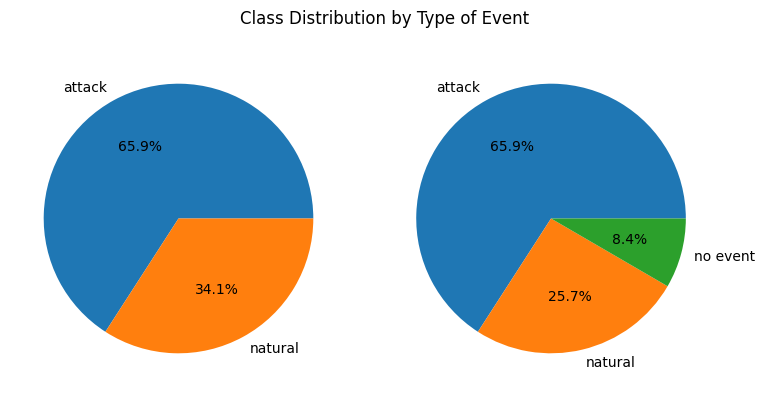

In [10]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
binary_class_counts = df['is_attack'].value_counts()
tertiary_class_counts = df['scenario_class'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(binary_class_counts, labels=['attack','natural'], autopct='%1.1f%%')
ax2.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


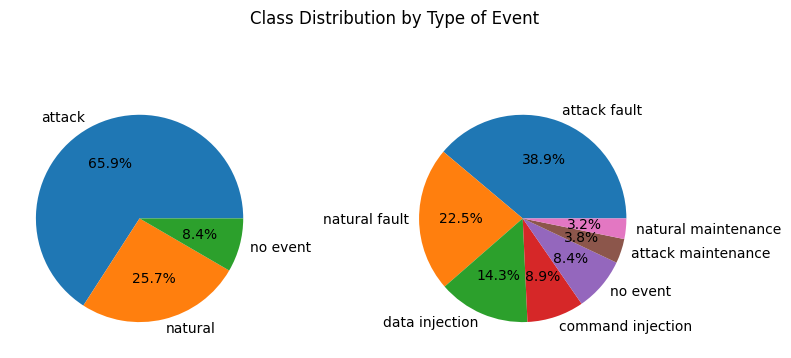

In [11]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
tertiary_class_counts = df['scenario_class'].value_counts()
broad_class_counts = df['scenario_broad_type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
ax2.pie(broad_class_counts, labels=broad_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [12]:
marker_pct = df['marker'].value_counts() / df.shape[0] * 100
print("Marker Class % of Dataset - Top 15")
marker_pct.sort_values(ascending=False).head(15)

Marker Class % of Dataset - Top 15


marker
41    8.378645
35    6.875160
5     5.769441
36    5.225705
28    4.601686
2     4.262307
30    4.003211
3     3.817100
4     3.802503
6     3.579900
12    3.430281
11    2.806262
27    2.769770
29    2.755173
8     2.408495
Name: count, dtype: float64

# Signal Visualization

**What does an event actually look like?**

Wave form representing real time signal: $$x(t) = X_m\cos(\omega t + \phi)$$

Where $X_m$ is the magnitude, $\omega$ is $2\pi$ times the frequency, and $\phi$ is the angle. This is valid for voltage and current.

In synchrophasor notation, the magnitude is not given directly. It is typically reported as RMS value, which is based on the integral of the waveform and simplified to $\frac{X_{max}}{\sqrt{2}}$.

Power can also be shown as a waveform; it is the product of voltage and current.
$$p(t) = v(t) \times i(t)$$

### Voltage, Power, Current for One Sample

In [13]:
# sample_bag = df['sample_id'].unique()
# choice = np.random.choice(sample_bag, 1)[0]

In [14]:
wave_df = df

# pick 1 sample
choice = wave_df['sample_id'].min() # known "no event"
sample_df = wave_df.loc[wave_df['sample_id'] == choice,:]
sample_class = sample_df['scenario_class'].unique()[0]

# lets just look at one phase from R1 sensor
R1_A_cols = [i for i in dp.waves if 'R1' in i and '_A_' in i and '_pos_neg_zero' not in i]
print(choice, sample_class, R1_A_cols, sample_df.shape)

15795 no event ['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave'] (173, 232)


Using matplotlib backend: module://matplotlib_inline.backend_inline


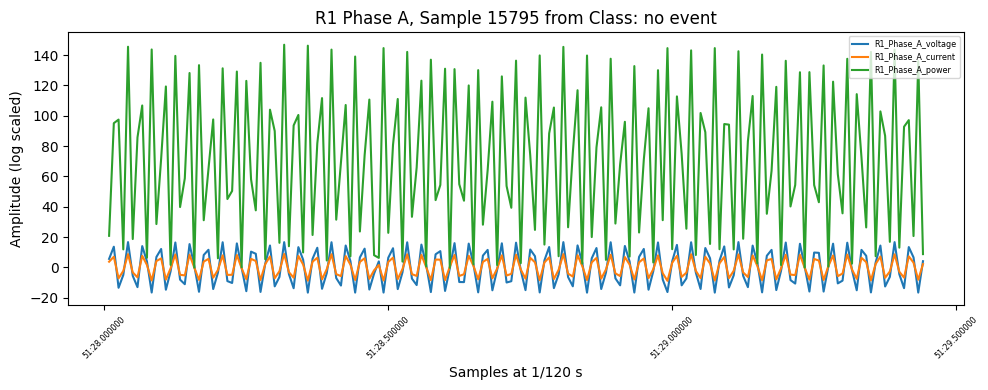

In [15]:
%matplotlib

plt.figure(figsize=(10,4))

for col in sample_df[R1_A_cols]:
    label = re.sub(r'_wave$','',col)
    plt.plot(sample_df['synthetic_datetime'],sample_df[col],label=label)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 Phase A, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

### A,B,C Phases

In [16]:
R1_all_phase_cols = [i for i in dp.R1_features if 'wave' in i and 'pos_neg_zero' not in i]
R1_all_phase_cols

['R1_Phase_A_voltage_wave',
 'R1_Phase_A_current_wave',
 'R1_Phase_A_power_wave',
 'R1_Phase_B_voltage_wave',
 'R1_Phase_B_current_wave',
 'R1_Phase_B_power_wave',
 'R1_Phase_C_voltage_wave',
 'R1_Phase_C_current_wave',
 'R1_Phase_C_power_wave']

Using matplotlib backend: module://matplotlib_inline.backend_inline


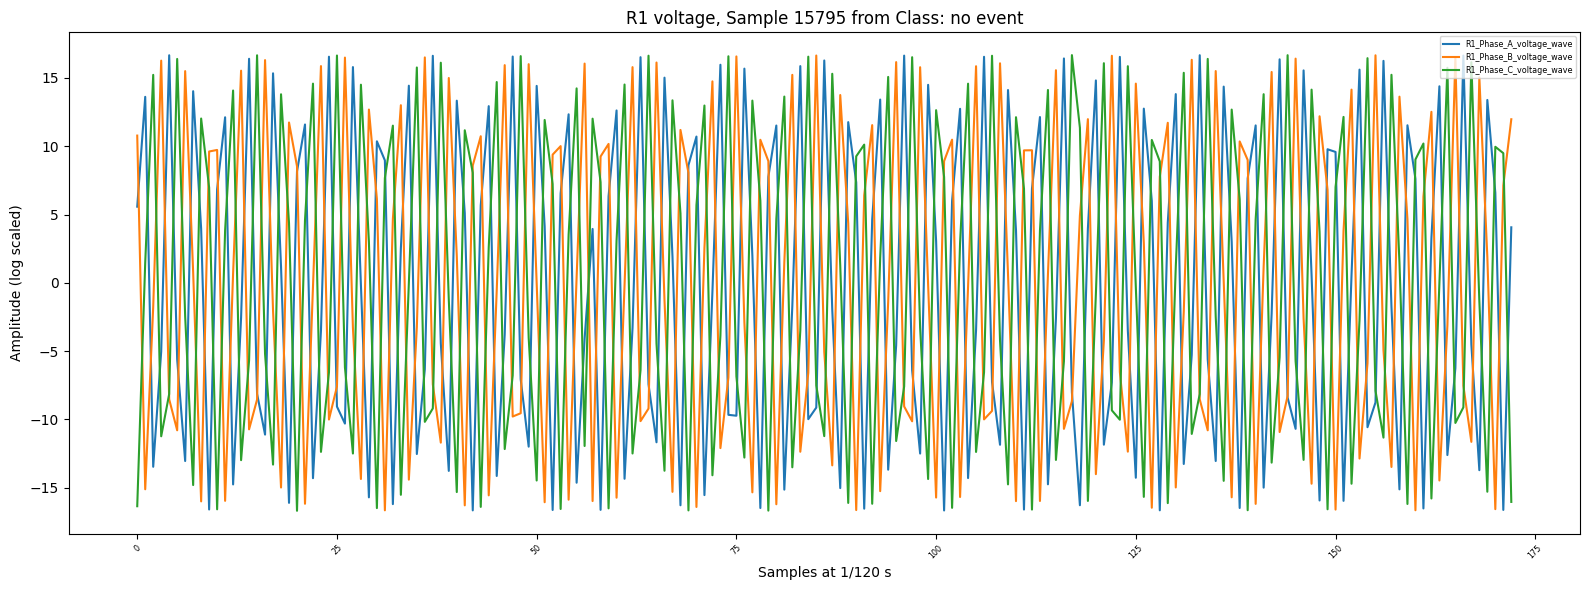

In [17]:
%matplotlib

plt.figure(figsize=(16,6))

filt = 'voltage'
for col in R1_all_phase_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


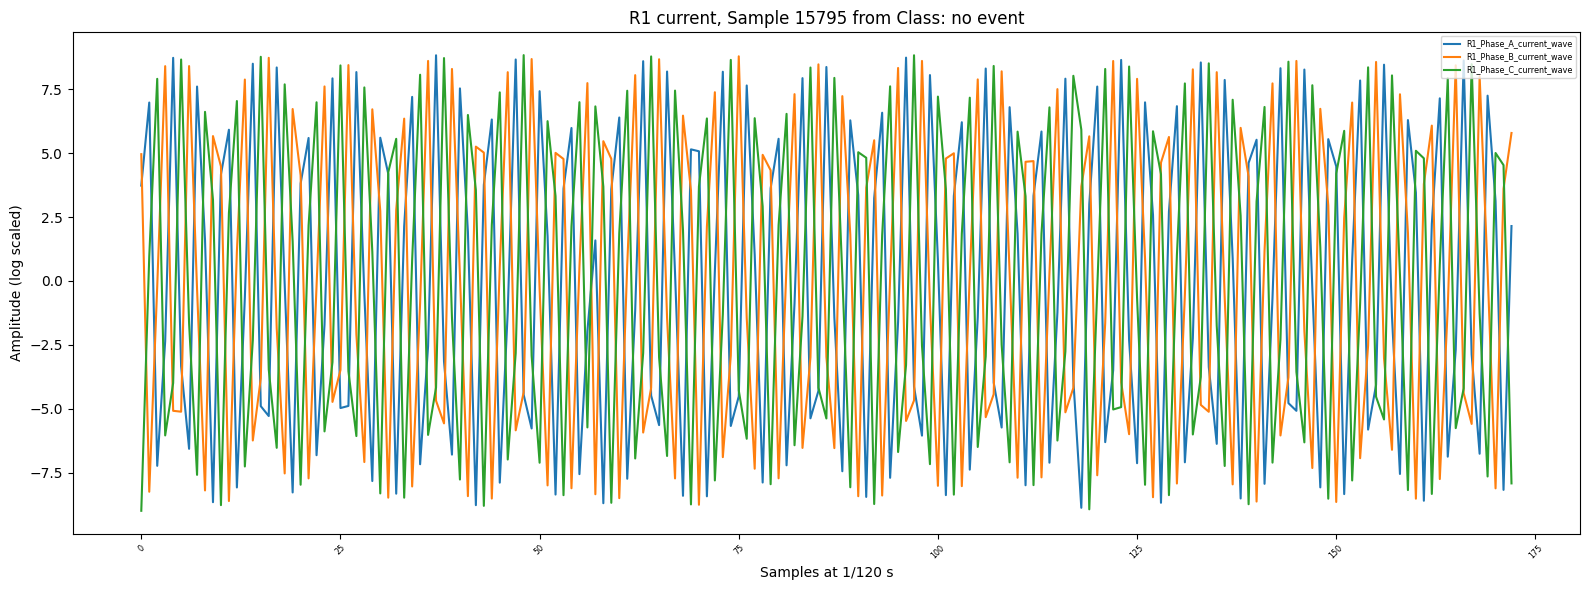

In [18]:
%matplotlib

plt.figure(figsize=(16,6))

filt = 'current'
for col in R1_all_phase_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


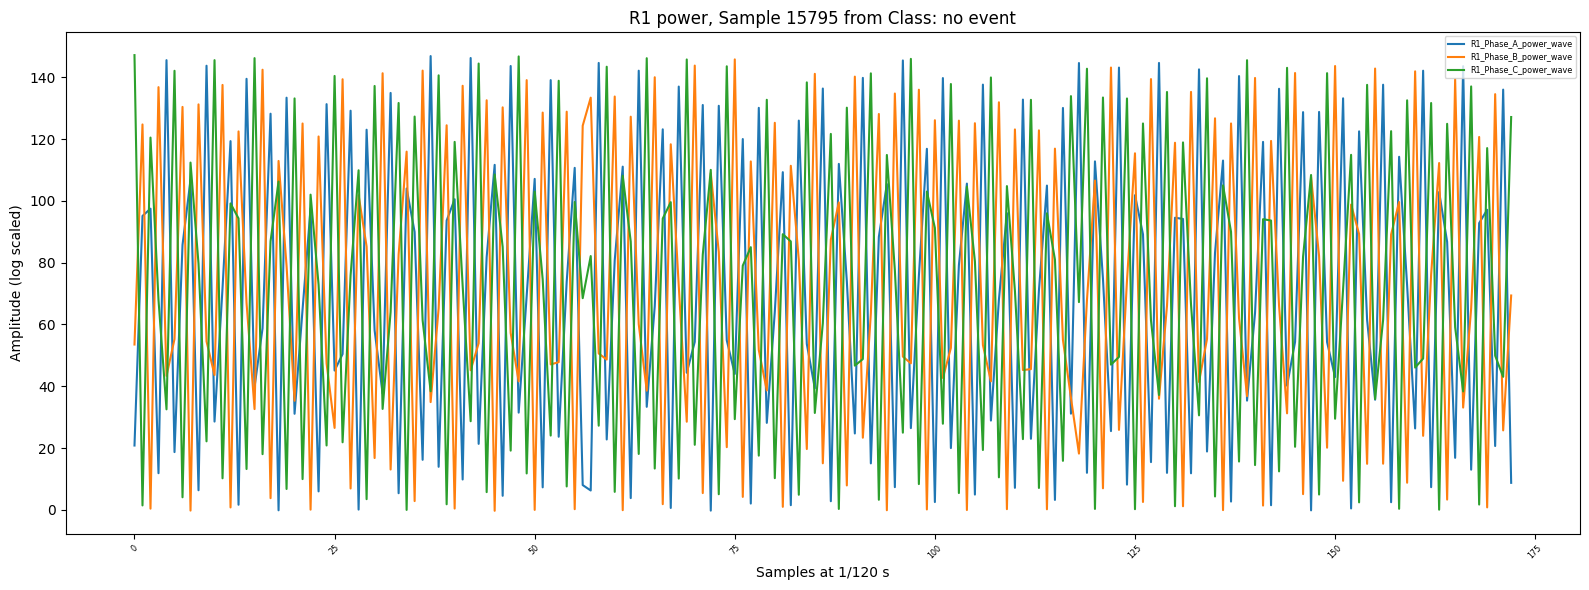

In [19]:
%matplotlib
plt.figure(figsize=(16,6))

filt = 'power'
for col in R1_all_phase_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

### Attack/No Attack

Using matplotlib backend: module://matplotlib_inline.backend_inline
15972 16297
{np.int64(15972): 'Fault from 20-79% on L1 with data injection tripping command', np.int64(16297): 'L2 line maintenance'}


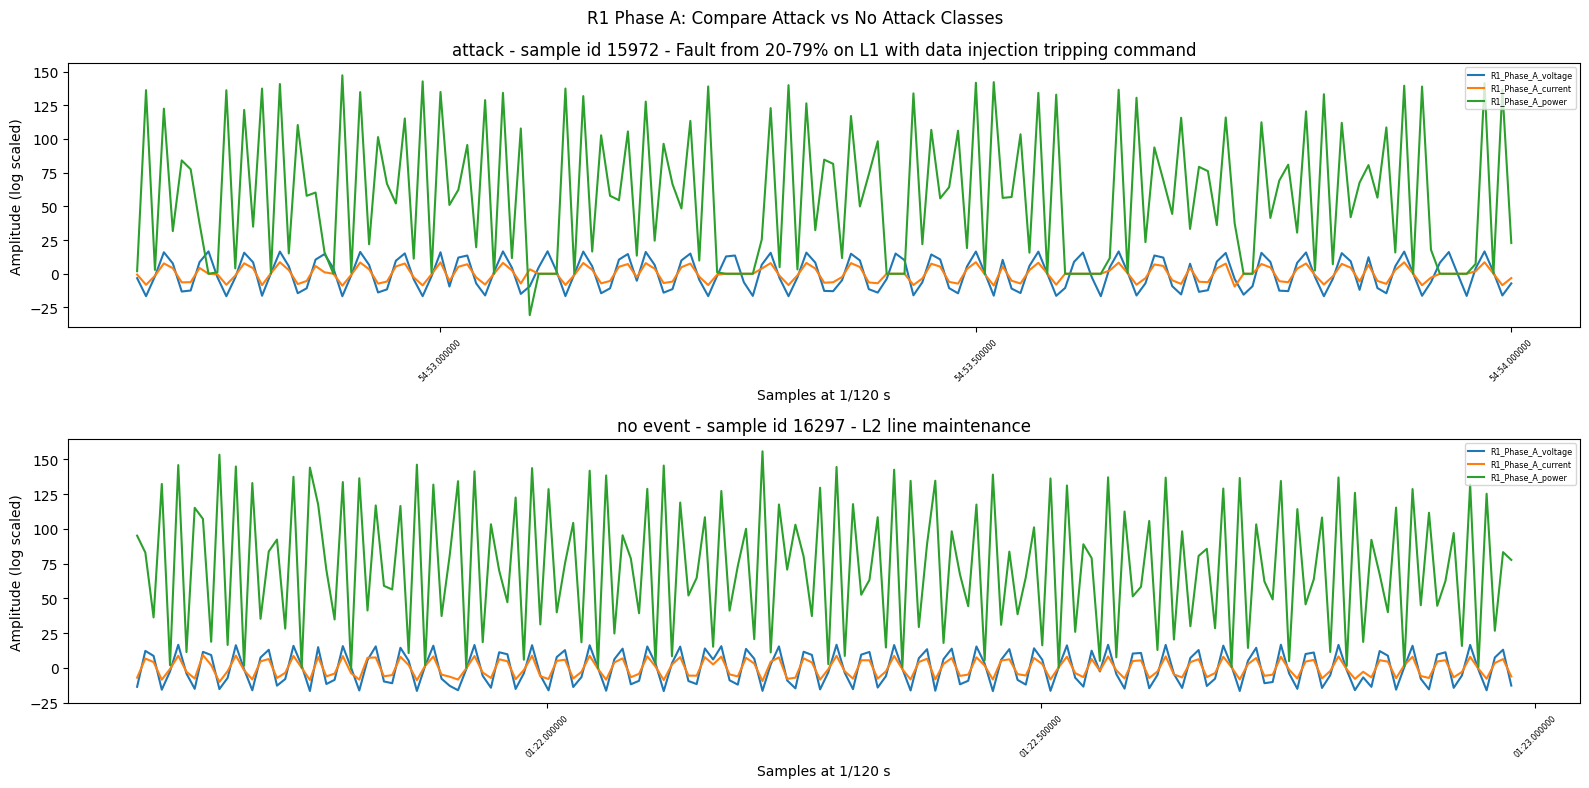

In [20]:
%matplotlib

# CHOOSE A RANDOM SAMPLE FROM EACH CLASS
attack_ids = wave_df.loc[wave_df['is_attack']==True,'sample_id'].unique()
no_attack_ids = wave_df.loc[wave_df['is_attack']==False,'sample_id'].unique()
attack_choice, no_attack_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0]
print(attack_choice, no_attack_choice)

# GET DATA FOR EACH SAMPLE
attack_df, no_attack_df = wave_df.loc[wave_df['sample_id']==attack_choice,:], wave_df.loc[wave_df['sample_id']==no_attack_choice,:]
event_detail = {i: wave_df.loc[wave_df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice]}
print(event_detail)

# PLOT, ITERATE BY CLASS
title = 'R1 Phase A: Compare Attack vs No Attack Classes'
class_dfs = [attack_df, no_attack_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}', \
                f'no event - sample id {no_attack_choice} - {event_detail[no_attack_choice]}' ]
                
fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 8))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        label = re.sub(r'_wave$','',col)
        ax[i].plot(dff['synthetic_datetime'],dff[col],label=label)
        ax[i].set_ylabel('Amplitude (log scaled)')
        ax[i].set_xlabel('Samples at 1/120 s')
        ax[i].tick_params(axis='x', labelrotation=45, labelsize='xx-small')
        ax[i].set_title(class_names[i])
        ax[i].legend(loc='upper right',fontsize='xx-small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

### Attack/Natural/No Event

In [21]:
df['scenario_class'].unique()

array(['no event', 'attack', 'natural'], dtype=object)

Using matplotlib backend: module://matplotlib_inline.backend_inline


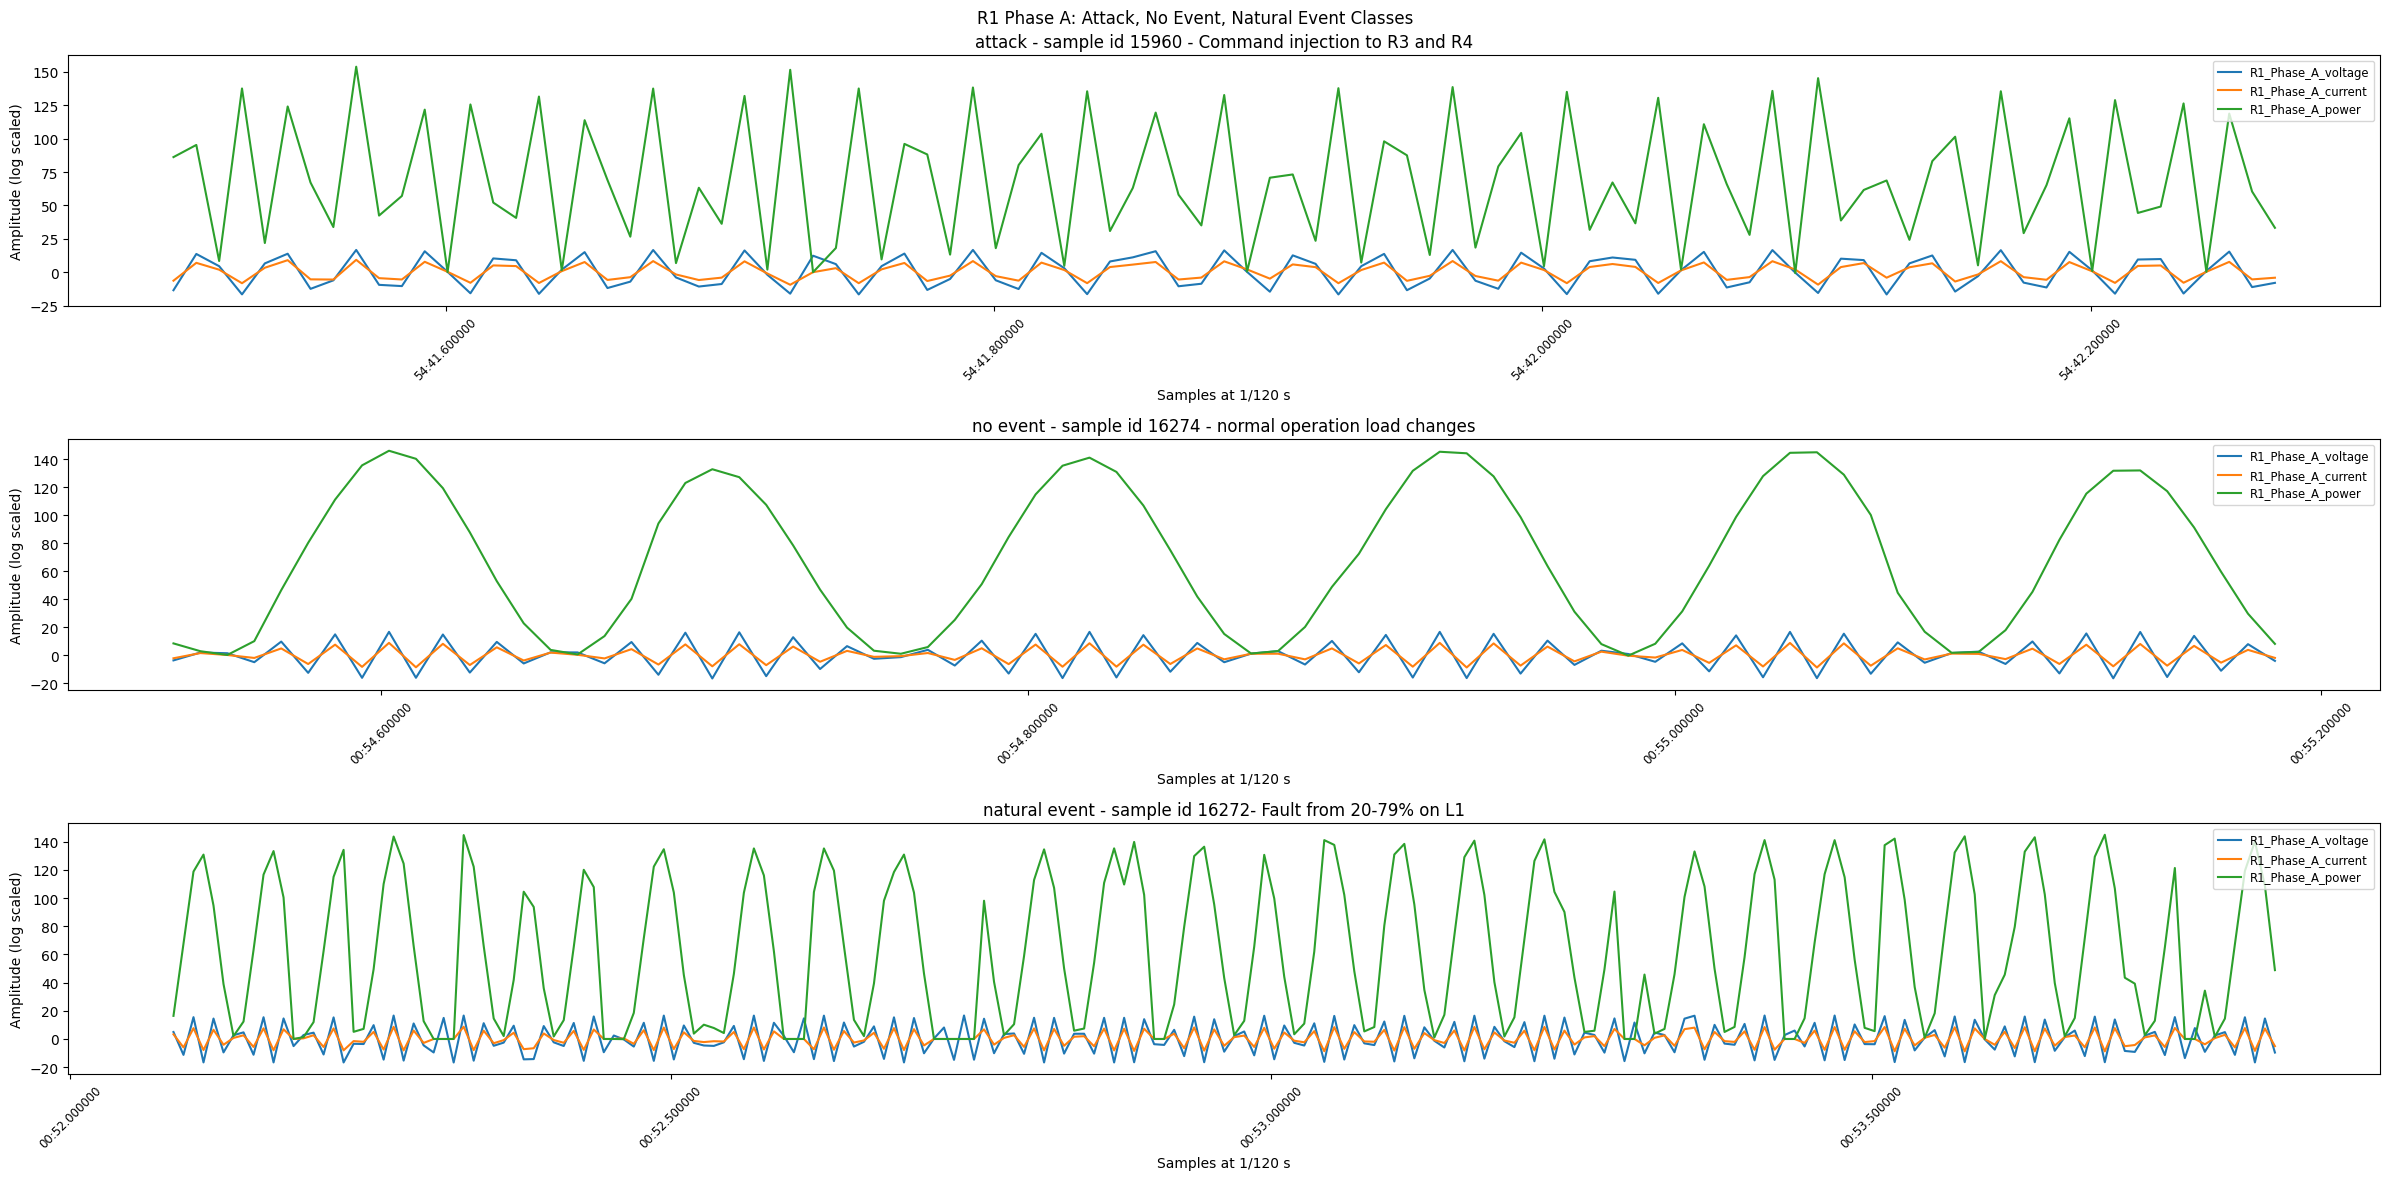

In [22]:
%matplotlib

# CHOOSE A RANDOM SAMPLE FROM EACH CLASS
attack_ids = wave_df.loc[df['scenario_class']=='attack','sample_id'].unique()
no_attack_ids = wave_df.loc[df['scenario_class']=='no event','sample_id'].unique()
natural_ids = wave_df.loc[df['scenario_class']=='natural','sample_id'].unique()
attack_choice, no_attack_choice, natural_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0], np.random.choice(natural_ids,1)[0]

# GET DATA FOR EACH SAMPLE
attack_wave_df, no_attack_wave_df, natural_wave_df = wave_df.loc[wave_df['sample_id']==attack_choice,:], wave_df.loc[wave_df['sample_id']==no_attack_choice,:], wave_df.loc[wave_df['sample_id']==natural_choice,:]
event_detail = {i: wave_df.loc[df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice, natural_choice]}

# PLOT, ITERATE BY CLASS
title = 'R1 Phase A: Attack, No Event, Natural Event Classes'
class_dfs = [attack_wave_df, no_attack_wave_df, natural_wave_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}',      \
                f'no event - sample id {no_attack_choice} - {event_detail[no_attack_choice]}', \
                f'natural event - sample id {natural_choice}- {event_detail[natural_choice]}' ]

fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        label = re.sub(r'_wave$','',col)
        ax[i].plot(dff['synthetic_datetime'],dff[col],label=label)
        ax[i].set_ylabel('Amplitude (log scaled)')
        ax[i].set_xlabel('Samples at 1/120 s')
        ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
        ax[i].set_title(class_names[i])
        ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

### Impedance Issue

* EDA uncovered infinite values of R (impedance)
* as we'll see below these are valid measures - when R == Inf, P, I, V go to 0
* but Inf values wont work in our models
* we try mean imputation - but then the 'math' doesn't work
* we engineer a binary flag to indicate moments of total impedance

In [23]:
# impedance_cols = [i for i in wave_df.columns if 'appearance_impedance_for_relays' in i]
# impedance_cols

# print('Frequency of infinite values')
# for i in impedance_cols:
#     filt = wave_df[i] == np.inf
#     print(i, filt.value_counts())


In [24]:
# # look at one known sample - we see the at Inf is an instantaneous value
# impeded_sample = wave_df.loc[1715:1725,:]
# impeded_sample['R4_appearance_impedance_for_relays']

In [25]:
# subset 
# R4_A_cols = [i for i in dp.R4_features if '_A_' in i and '_wave' in i]
# sample_id = impeded_sample['sample_id'].unique()[0]
# event_detail = impeded_sample['scenario_class'].unique()[0]

In [26]:
# %matplotlib
# title = f'R4 - Infinite Impedance - Subset of Sample {sample_id}: {event_detail}'
# plt.figure(figsize=(4,4))
# plt.plot(impeded_sample['synthetic_datetime'],impeded_sample['R4_appearance_impedance_for_relays'],label='R4 impedance')
# plt.ylabel('Impedance')
# plt.xlabel('Samples at 1/120s')
# plt.xticks(rotation=45,fontsize='xx-small')
# plt.legend(fontsize='xx-small')
# plt.tight_layout()
# plt.title(title)
# plt.show()

In [27]:
# %matplotlib

# # PLOT
# title = f'R4 - Effect of Infinite Impedance - Subset of Sample {sample_id}: {event_detail}'
# moment_of_total_impedance = impeded_sample.loc[1721,'synthetic_datetime']

# for col in R4_A_cols:
#     plt.plot(impeded_sample['synthetic_datetime'],impeded_sample[col],label=col)
#     plt.ylabel('Amplitude (log scaled)')
#     plt.xlabel('Indices of Samples at 1/120 s')
#     plt.xticks(rotation=45)
#     plt.legend()
# plt.scatter(x=moment_of_total_impedance,y=0,marker='o',color='k')
# plt.annotate('R = Inf',xy=(moment_of_total_impedance,0),xytext=(moment_of_total_impedance,-10))

# plt.title(title)
# plt.tight_layout()
# plt.show()

### Engineer total impedance flag

In [28]:
# wave_df = dp.binarize_values(cols=impedance_cols).get_dataframe()
# wave_df.loc[1715:1725,'R4_appearance_impedance_for_relays']

### Descriptive EDA - IQR

In [29]:
# plot waveform with mean, IQR range by class
%matplotlib

# CHOOSE A RANDOM SAMPLE FOR EACH CLASS
attack_ids = wave_df.loc[wave_df['scenario_class']=='attack','sample_id'].unique()
no_attack_ids = wave_df.loc[wave_df['scenario_class']=='no event','sample_id'].unique()
natural_ids = wave_df.loc[wave_df['scenario_class']=='natural','sample_id'].unique()
attack_choice, no_attack_choice, natural_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0], np.random.choice(natural_ids,1)[0]

# GET DATA FOR EACH SAMPLE
attack_df, no_attack_df, natural_df = wave_df.loc[wave_df['sample_id']==attack_choice,:], wave_df.loc[wave_df['sample_id']==no_attack_choice,:], wave_df.loc[wave_df['sample_id']==natural_choice,:]
event_detail = {i: wave_df.loc[wave_df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice, natural_choice]}

# PLOT ATTRIBUTES
title = 'R1 Phase A: Compare Attack, No Event, Natural Event Classes'
class_dfs = [attack_wave_df, no_attack_wave_df, natural_wave_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}',      \
                f'no event - sample id {no_attack_choice} - {event_detail[no_attack_choice]}', \
                f'natural event - sample id {natural_choice}- {event_detail[natural_choice]}' ]


Using matplotlib backend: module://matplotlib_inline.backend_inline


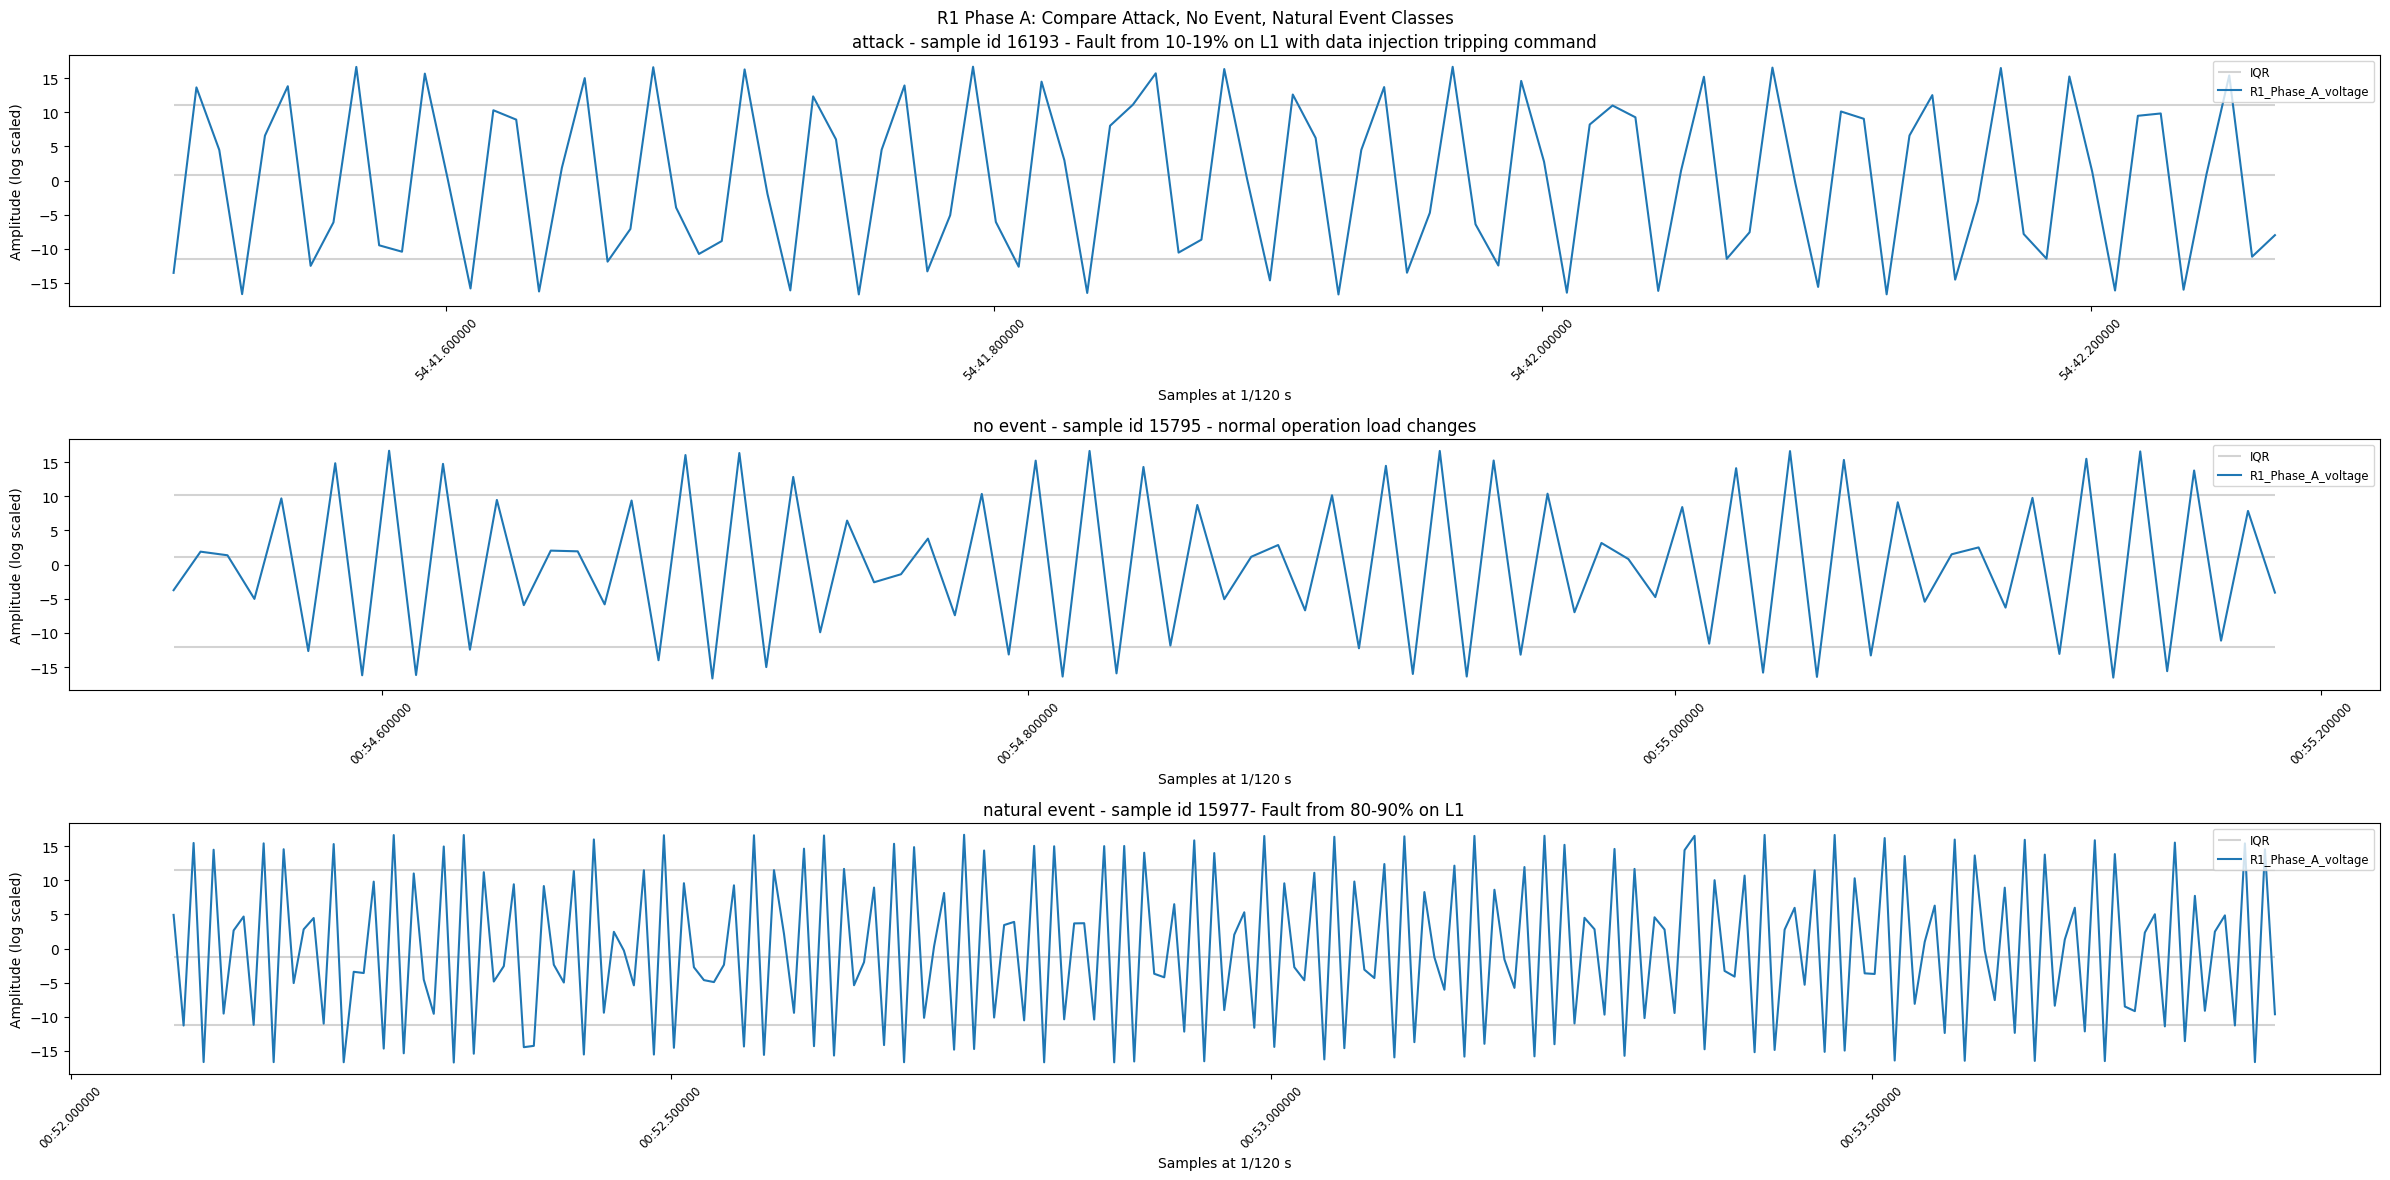

In [30]:
# V
fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        if 'voltage' in col.lower():
            desc = s.describe_wave(dff[col])
            label = re.sub(r'_wave$','',col)
            ax[i].hlines([desc['median'],desc['q25'],desc['q75']],xmin=dff['synthetic_datetime'].min(), xmax=dff['synthetic_datetime'].max(),colors='lightgrey',label='IQR')
            ax[i].plot(dff['synthetic_datetime'],dff[col],label=label)
            ax[i].set_ylabel('Amplitude (log scaled)')
            ax[i].set_xlabel('Samples at 1/120 s')
            ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
            ax[i].set_title(class_names[i])
            ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

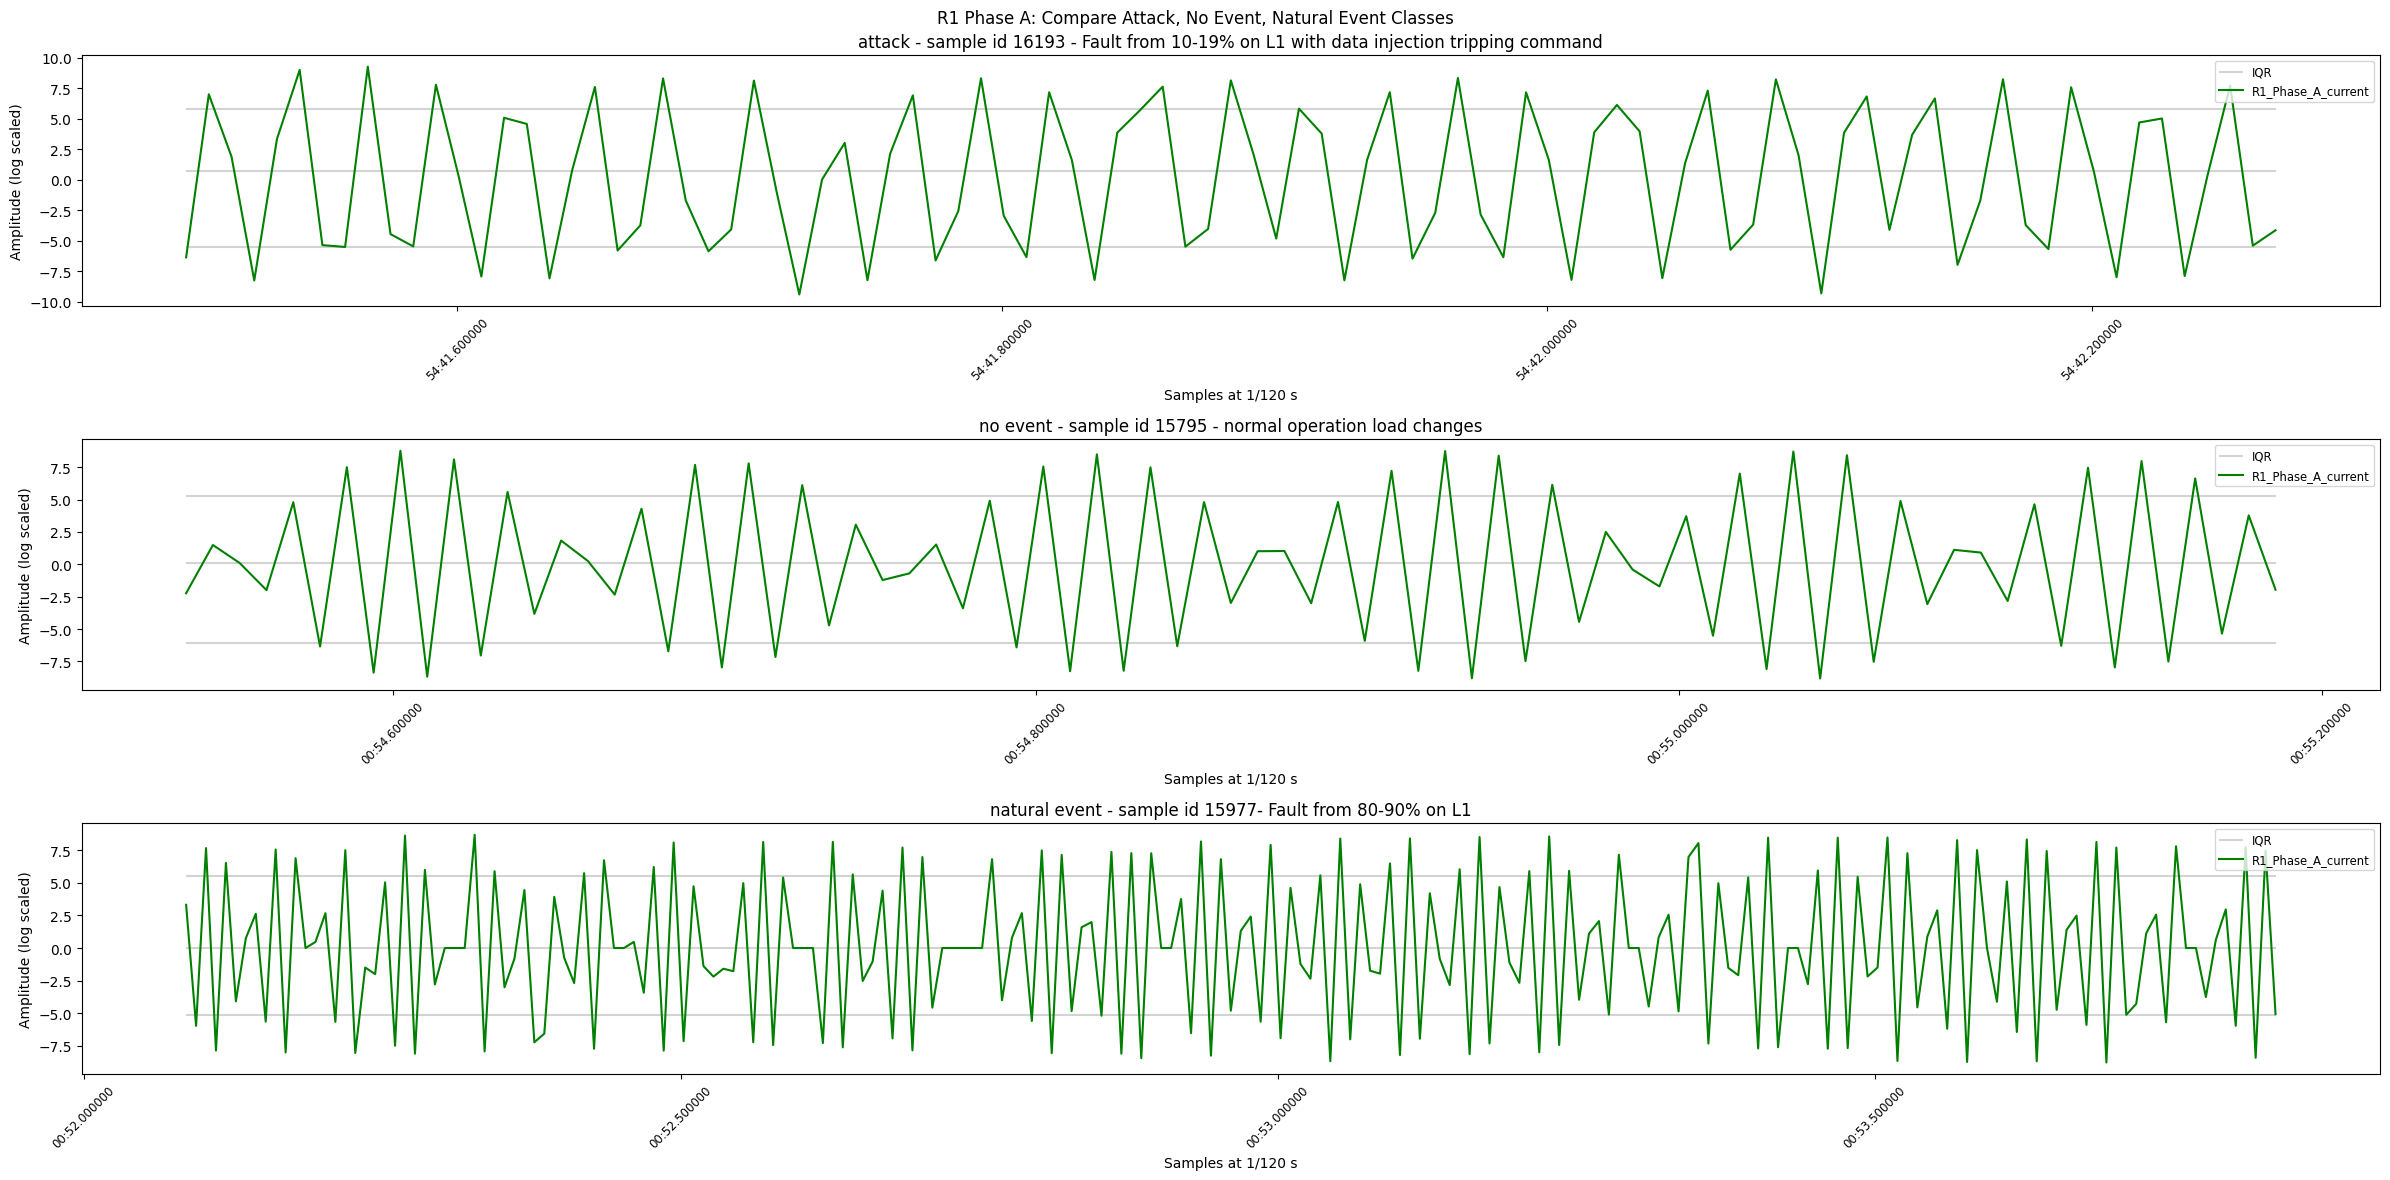

In [31]:
# V
fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        if 'current' in col.lower():
            desc = s.describe_wave(dff[col])
            label = re.sub(r'_wave$','',col)
            ax[i].hlines([desc['median'],desc['q25'],desc['q75']],xmin=dff['synthetic_datetime'].min(), xmax=dff['synthetic_datetime'].max(),colors='lightgrey',label='IQR')
            ax[i].plot(dff['synthetic_datetime'],dff[col],label=label,color='g')
            ax[i].set_ylabel('Amplitude (log scaled)')
            ax[i].set_xlabel('Samples at 1/120 s')
            ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
            ax[i].set_title(class_names[i])
            ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

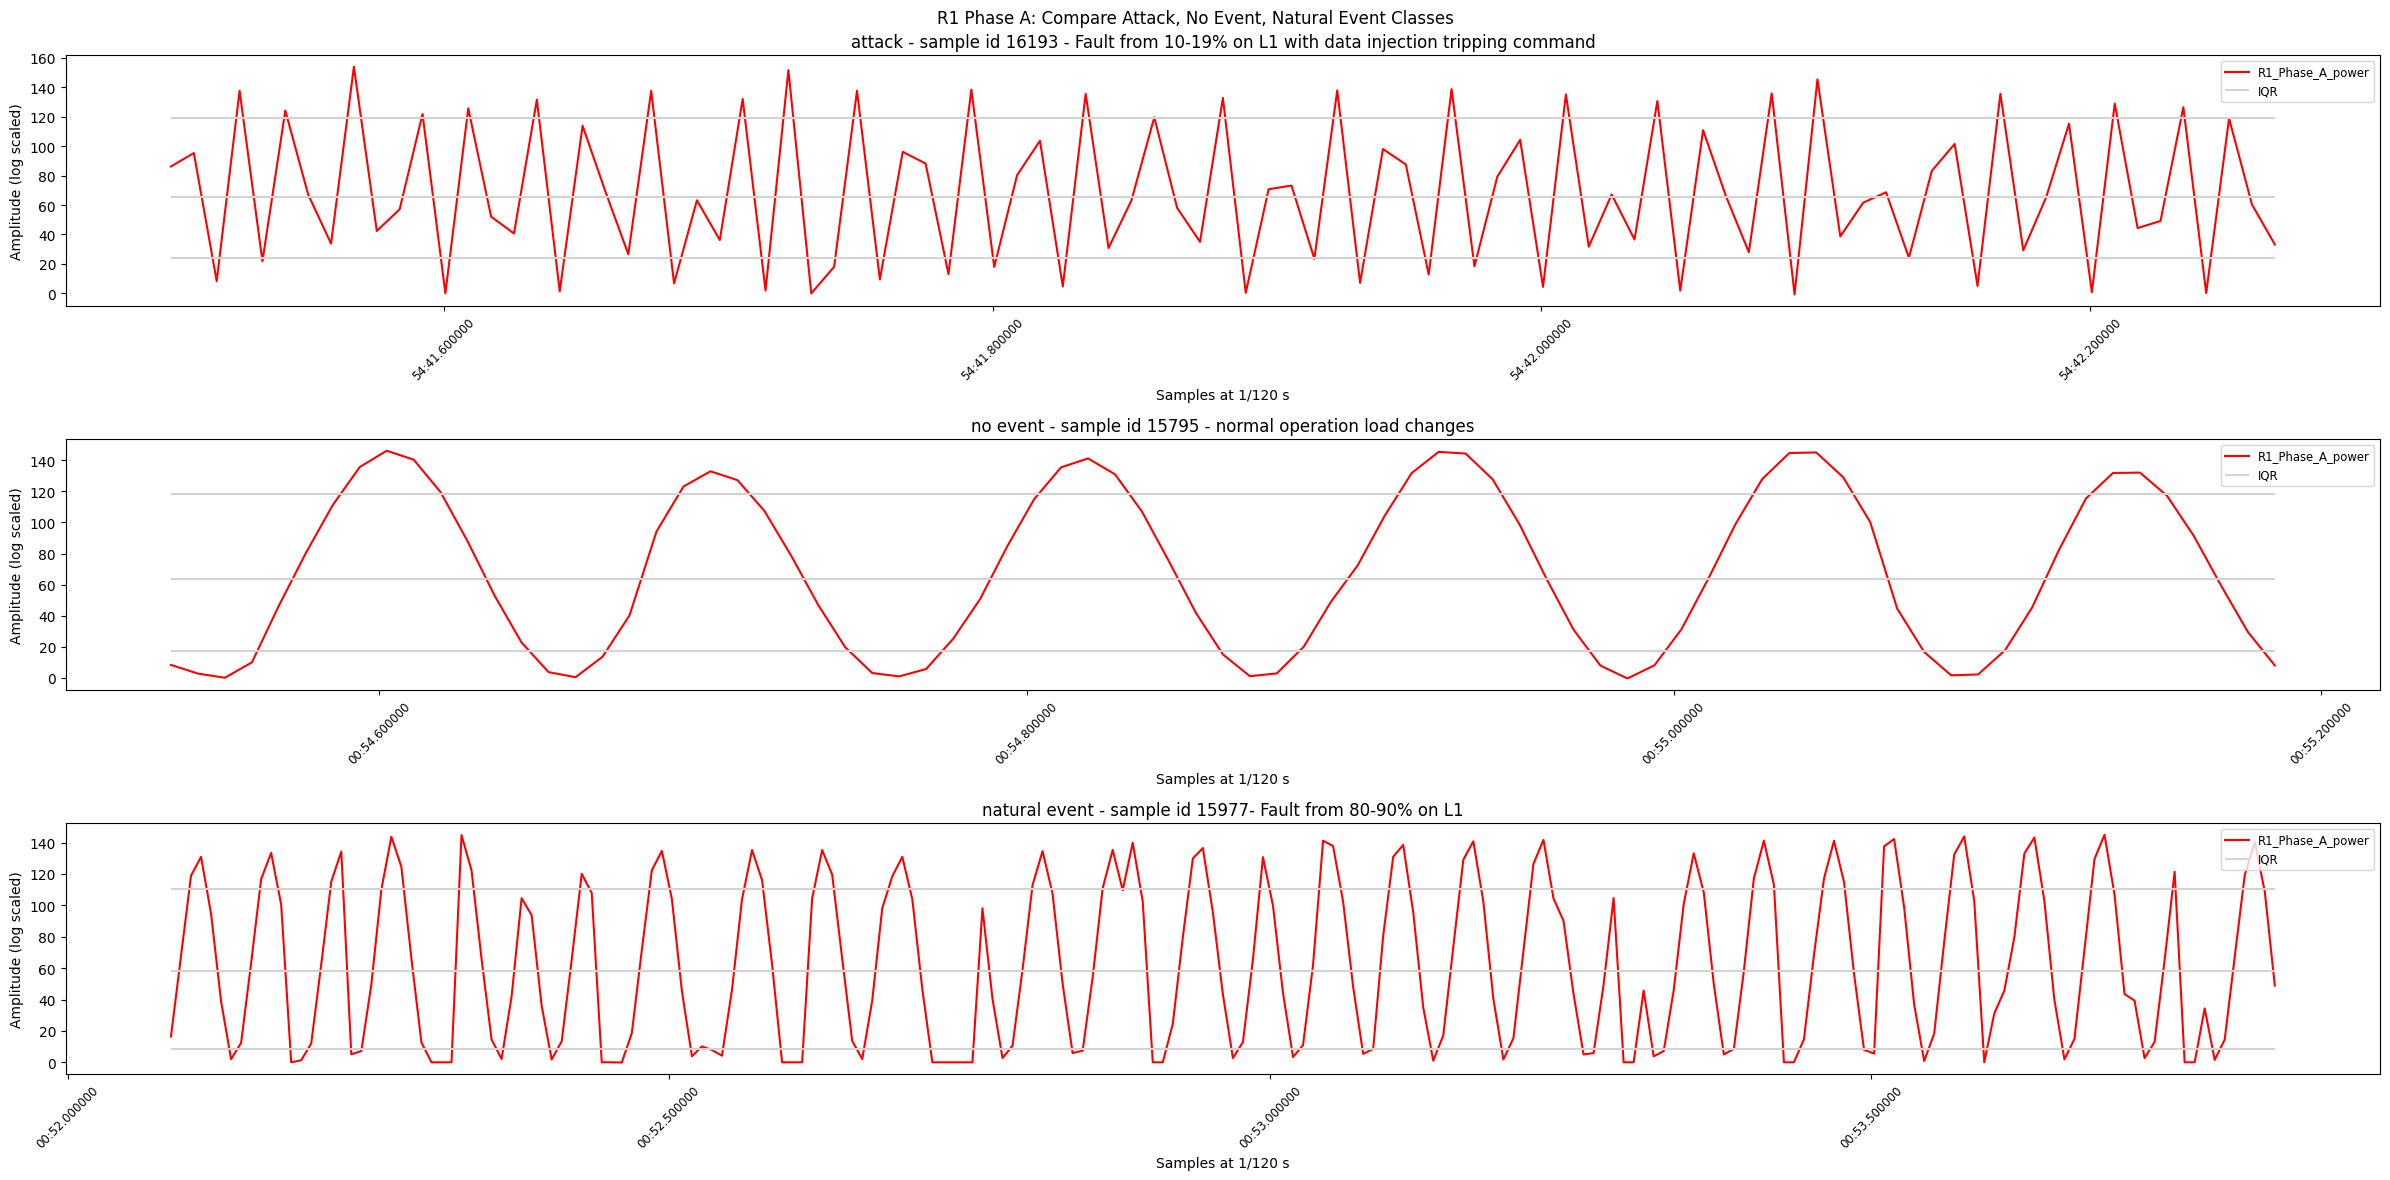

In [32]:
# P
fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        if 'power' in col.lower() and 'avg_power':
            if 'avg_power'in col.lower():
                ax[i].plot(dff[col],label=col,color='b')
            else:
                desc = s.describe_wave(dff[col])
                label = re.sub(r'_wave$','',col)
                ax[i].plot(dff['synthetic_datetime'],dff[col],label=label,color='r')
                ax[i].hlines([desc['median'],desc['q25'],desc['q75']],xmin=dff['synthetic_datetime'].min(), xmax=dff['synthetic_datetime'].max(),colors='lightgrey',label='IQR')
            ax[i].set_ylabel('Amplitude (log scaled)')
            ax[i].set_xlabel('Samples at 1/120 s')
            ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
            ax[i].set_title(class_names[i])
            ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

### Descriptive EDA

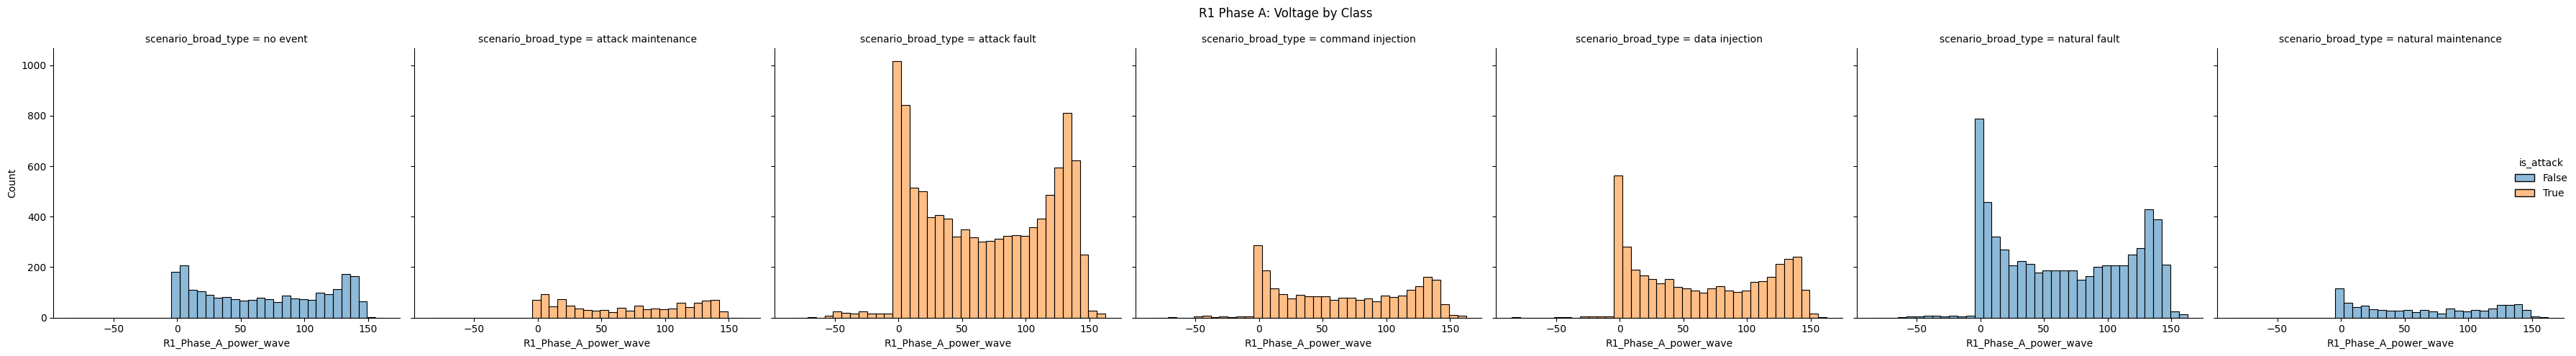

In [33]:
# plot amplitude by class
title = 'R1 Phase A: Voltage by Class'
g = sns.displot(wave_df, x='R1_Phase_A_power_wave', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()


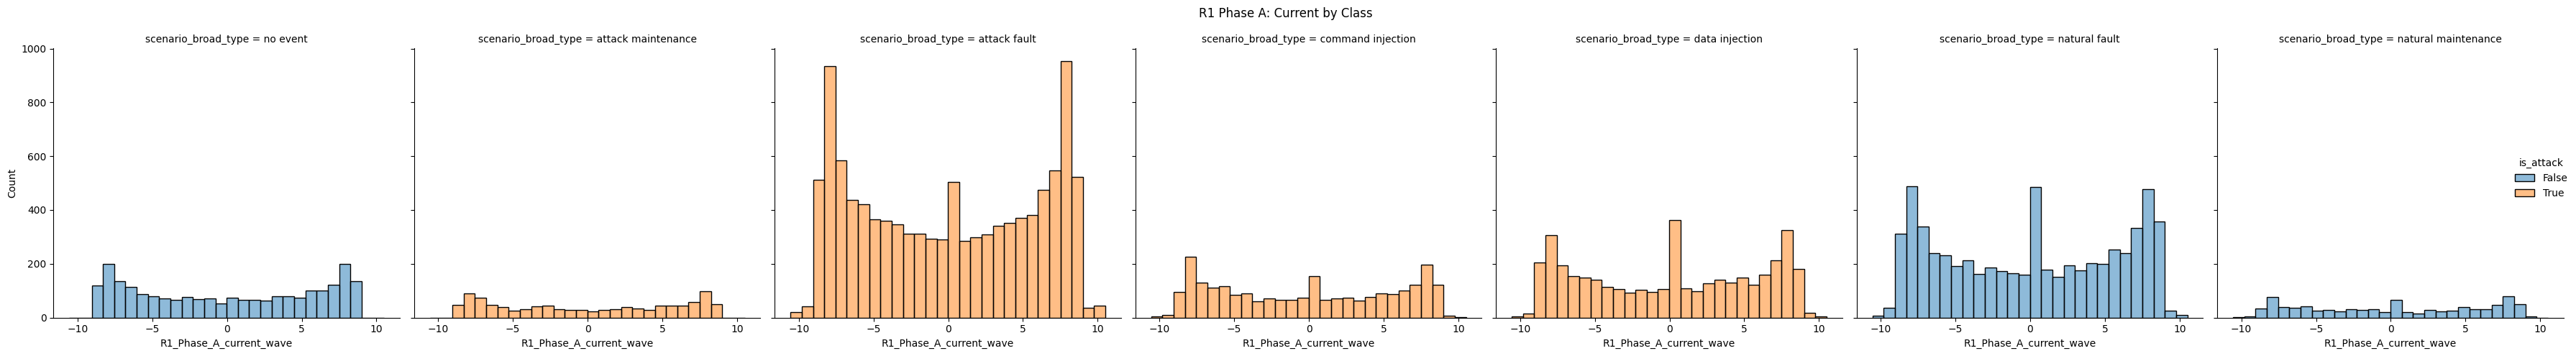

In [34]:
# plot amplitude by class
title = 'R1 Phase A: Current by Class'
g = sns.displot(wave_df, x='R1_Phase_A_current_wave', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()


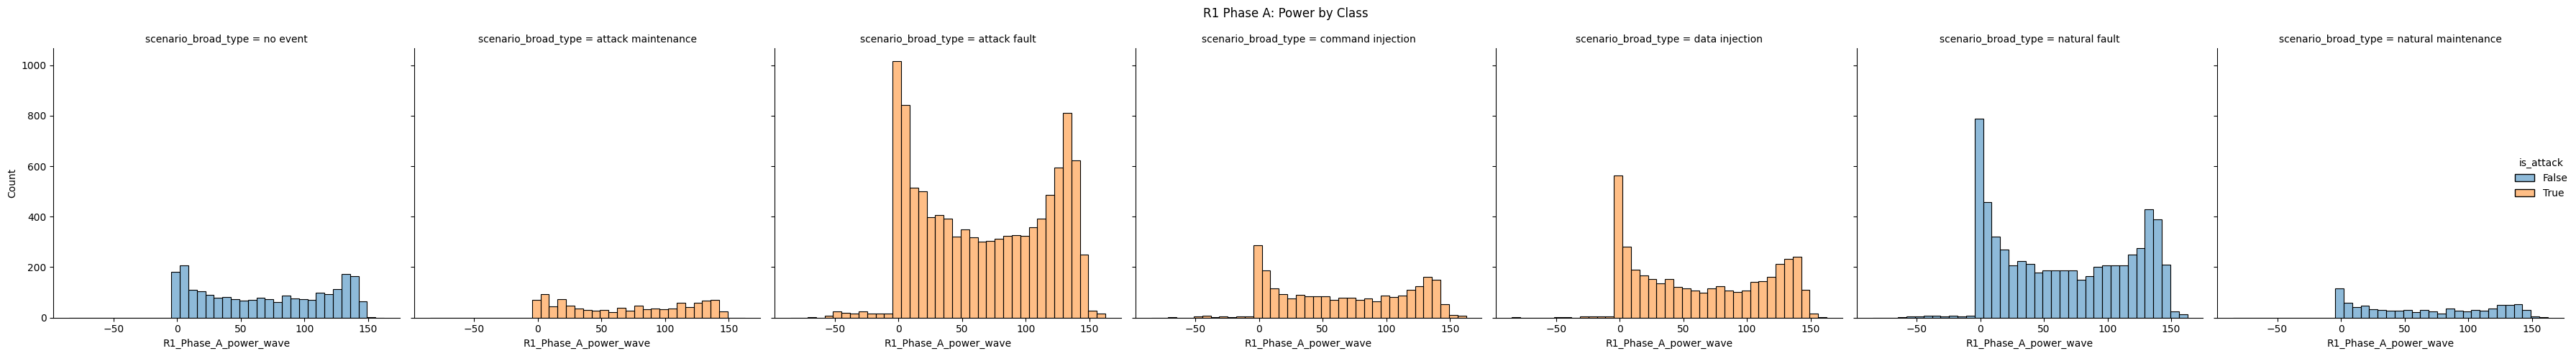

In [35]:
# plot amplitude by class
title = 'R1 Phase A: Power by Class'
g = sns.displot(wave_df, x='R1_Phase_A_power_wave', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()


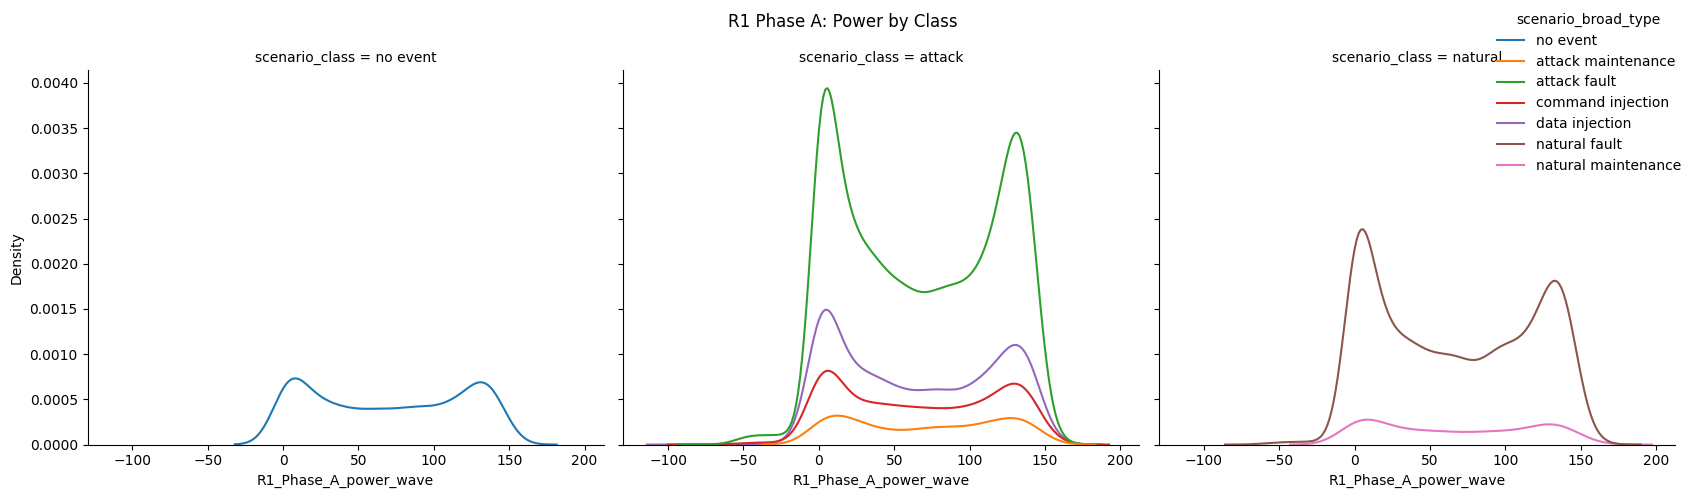

In [36]:
# plot amplitude by class
title = 'R1 Phase A: Power by Class'
g = sns.displot(wave_df, x='R1_Phase_A_power_wave', col='scenario_class', hue='scenario_broad_type', kind='kde')
sns.move_legend(g, loc='upper right')
plt.suptitle(title)
plt.tight_layout()
plt.show()


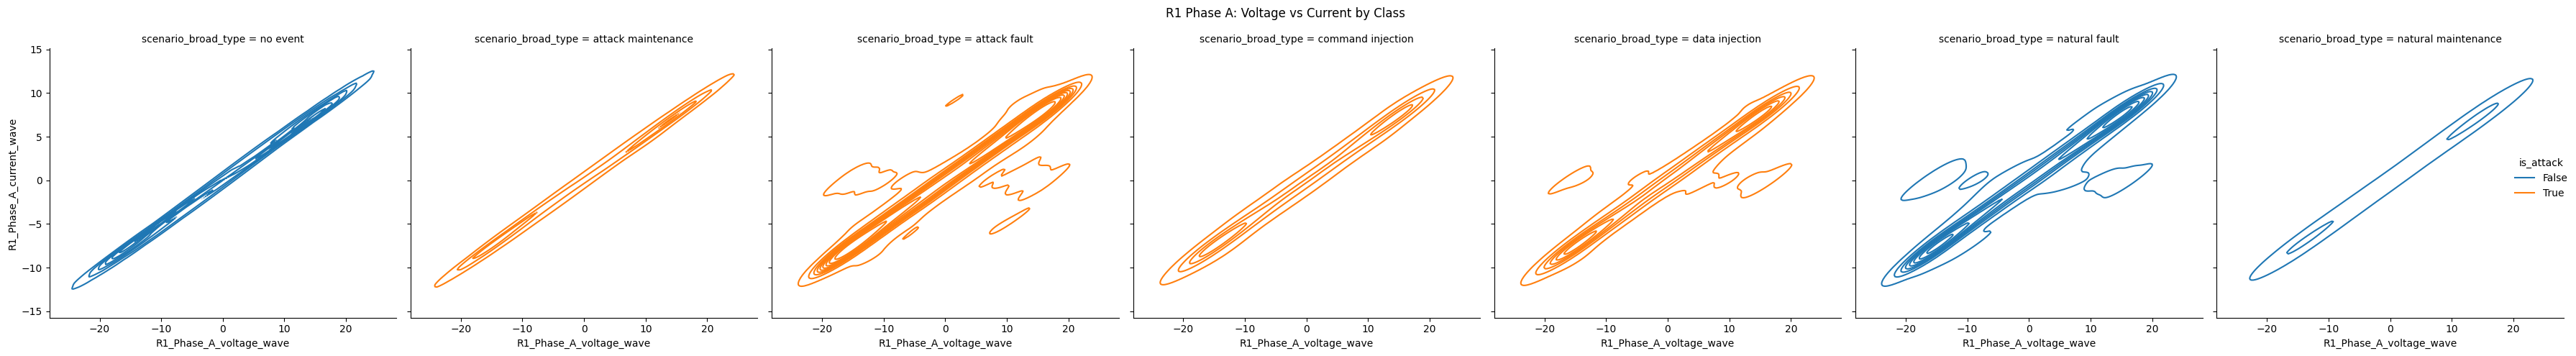

In [37]:
title = 'R1 Phase A: Voltage vs Current by Class'

sns.displot(wave_df, x='R1_Phase_A_voltage_wave', y='R1_Phase_A_current_wave', col='scenario_broad_type', hue='is_attack', kind='kde')
plt.suptitle(title)
plt.tight_layout()
plt.show()


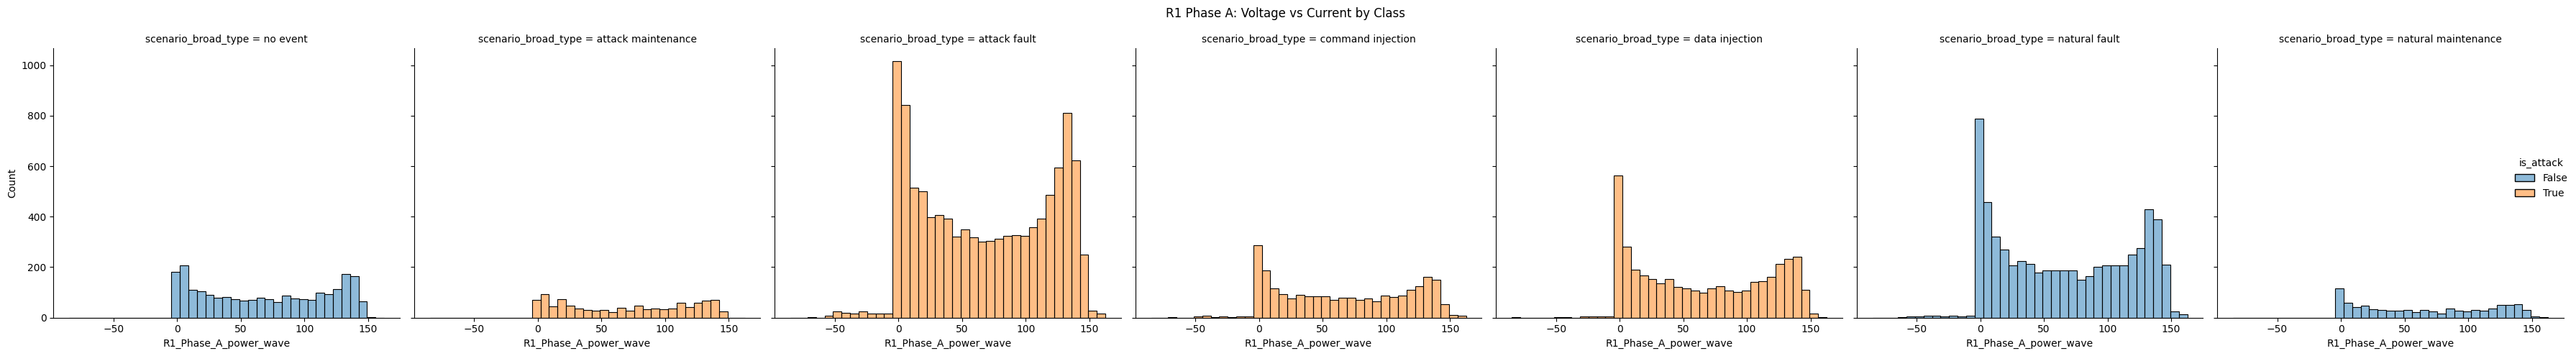

In [ ]:
title = 'R1 Phase A: Power by Class'

sns.displot(wave_df, x='R1_Phase_A_power_wave', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()


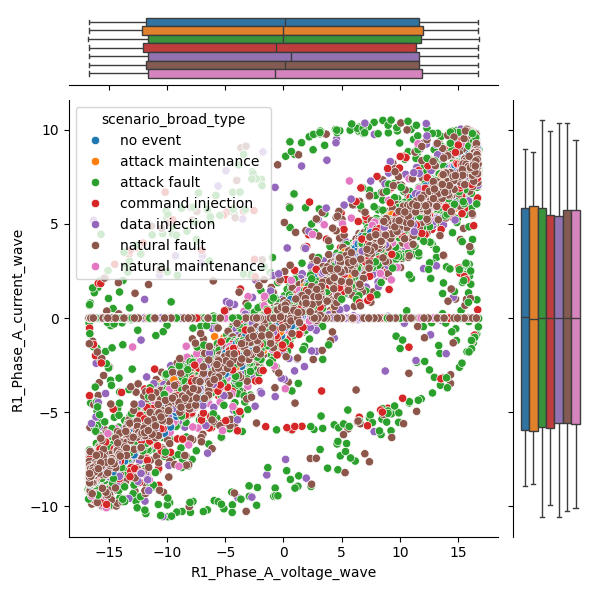

In [39]:
# plot box plots, amplitude of V, I, P by class
g = sns.JointGrid(data=wave_df, x='R1_Phase_A_voltage_wave', y='R1_Phase_A_current_wave', hue='scenario_broad_type')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)

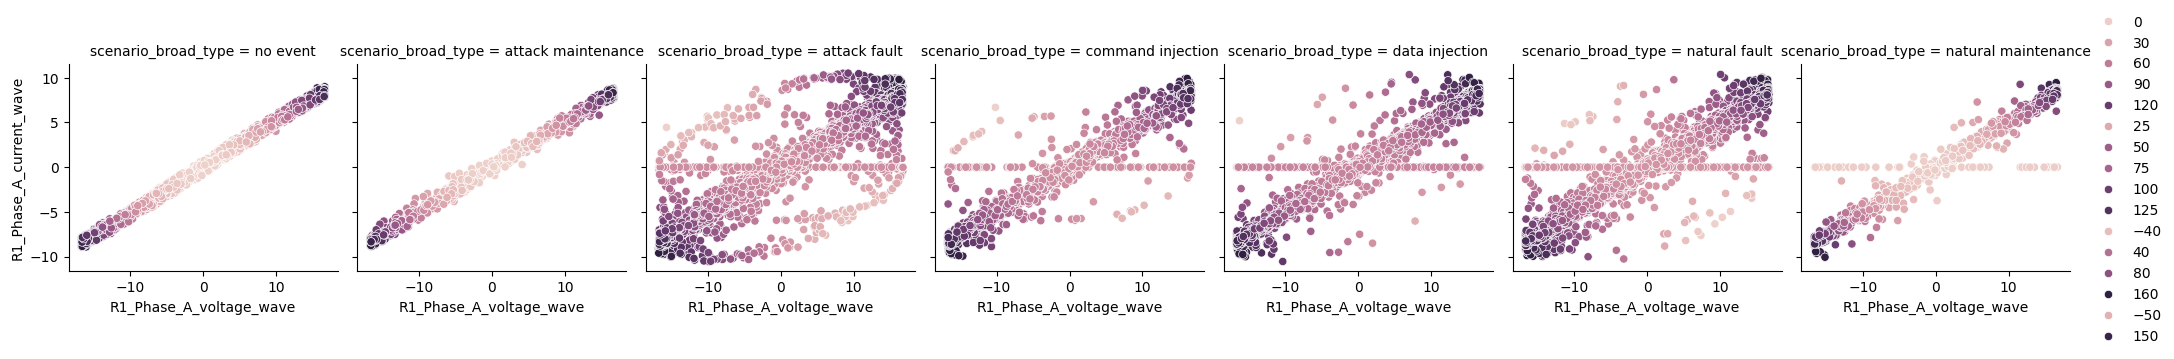

In [40]:
g = sns.FacetGrid(wave_df, col='scenario_broad_type')
g.map_dataframe(sns.scatterplot,'R1_Phase_A_voltage_wave','R1_Phase_A_current_wave',hue='R1_Phase_A_power_wave')
g.add_legend()

### Signal Class EDA

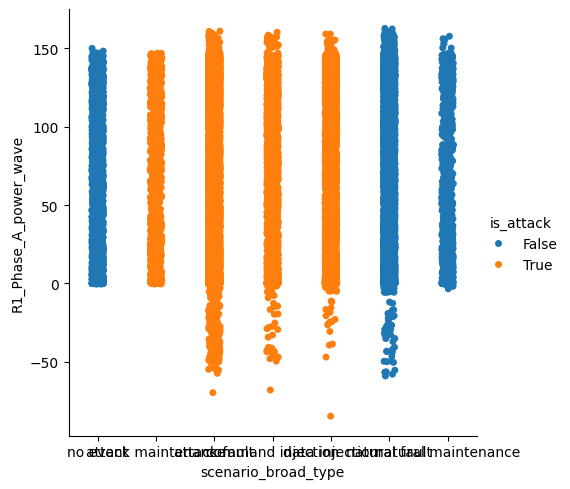

In [41]:
# amplitude by class
sns.catplot(data=wave_df, x="scenario_broad_type", y="R1_Phase_A_power_wave", hue='is_attack')

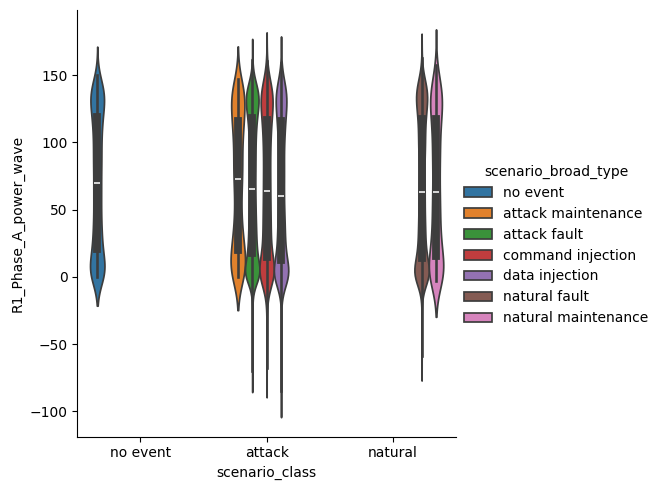

In [42]:
sns.catplot(wave_df, x="scenario_class", y="R1_Phase_A_power_wave", kind='violin', hue='scenario_broad_type')

# Correlation
Examine cross correlation for feature reduction and early insights on target correlation.

Target Correlation
* hardly any correlation to target class features

Cross Correlation
* Impedance strongly correlated with power and certain log entries, and may be dropped.
* Measures from sensors (R1, R2) and (R3, R4) of the same phase are strongly correlated respectively because each pair of sensors are taking similar readings on the same line (L1, L2)
* Measures of A, B, C phases are inversely correlated because they are intended to be multiplied to create different power combinations.
* I, V, P have strong relationships because of their mathematical relationship.
* Log/status columns: of all the status/log columns, only the relayN logs appear to have any meaningful correlation to the measures. so snort log, control panel log, etc can be removed
* pos/neg zero phase voltage, power, current is fully correlated with the primary measures


In [43]:
corr_df = wave_df.drop(columns = dp.magnitudes + dp.frequencies + dp.angles) # these values can be dropped since we have the waveform
one_hot_scenario_classes = pd.get_dummies(corr_df['scenario_class']) # one hot encode scenario class
corr_df = pd.concat([corr_df, one_hot_scenario_classes], axis=1).select_dtypes(include=['number','boolean'])

In [44]:
corr = corr_df.corr()

In [45]:
# correlations to binary target feature 'is_attack'
corr['is_attack'].sort_values(ascending=False)[1:15]

attack                               1.000000
R4_status_flag_for_relays            0.043916
R3_Phase_A_pos_neg_zero_avg_power    0.032220
R3_Phase_A_avg_power                 0.032220
R2_status_flag_for_relays            0.022209
R3_Phase_B_pos_neg_zero_avg_power    0.014944
R3_Phase_B_avg_power                 0.014944
R2_Phase_A_avg_power                 0.013544
R2_Phase_A_pos_neg_zero_avg_power    0.013544
R3_Phase_A_power_wave                0.013005
R3_Phase_C_pos_neg_zero_avg_power    0.012329
R3_Phase_C_avg_power                 0.012329
R1_Phase_B_pos_neg_zero_avg_power    0.009636
R1_Phase_B_avg_power                 0.009636
Name: is_attack, dtype: float64

In [46]:
# correlations to 3-class 'scenario class' feature
corr.loc[:, one_hot_scenario_classes.columns.to_list()].sort_values(by=one_hot_scenario_classes.columns.to_list(), ascending=[False, False, False]).head(15)

attack   natural  no event
is_attack                          1.000000 -0.818116 -0.420201
attack                             1.000000 -0.818116 -0.420201
R4_status_flag_for_relays          0.043916 -0.024537 -0.036430
R3_Phase_A_avg_power               0.032220  0.010136 -0.071129
R3_Phase_A_pos_neg_zero_avg_power  0.032220  0.010136 -0.071129
R2_status_flag_for_relays          0.022209 -0.010955 -0.020716
R3_Phase_B_avg_power               0.014944  0.024312 -0.063936
R3_Phase_B_pos_neg_zero_avg_power  0.014944  0.024312 -0.063936
R2_Phase_A_avg_power               0.013544  0.029884 -0.070334
R2_Phase_A_pos_neg_zero_avg_power  0.013544  0.029884 -0.070334
R3_Phase_A_power_wave              0.013005 -0.000639 -0.021245
R3_Phase_C_avg_power               0.012329  0.026905 -0.063552
R3_Phase_C_pos_neg_zero_avg_power  0.012329  0.026905 -0.063552
R1_Phase_B_avg_power               0.009636 -0.051259  0.064397
R1_Phase_B_pos_neg_zero_avg_power  0.009636 -0.051259  0.064397

Using matplotlib backend: module://matplotlib_inline.backend_inline


<Axes: >

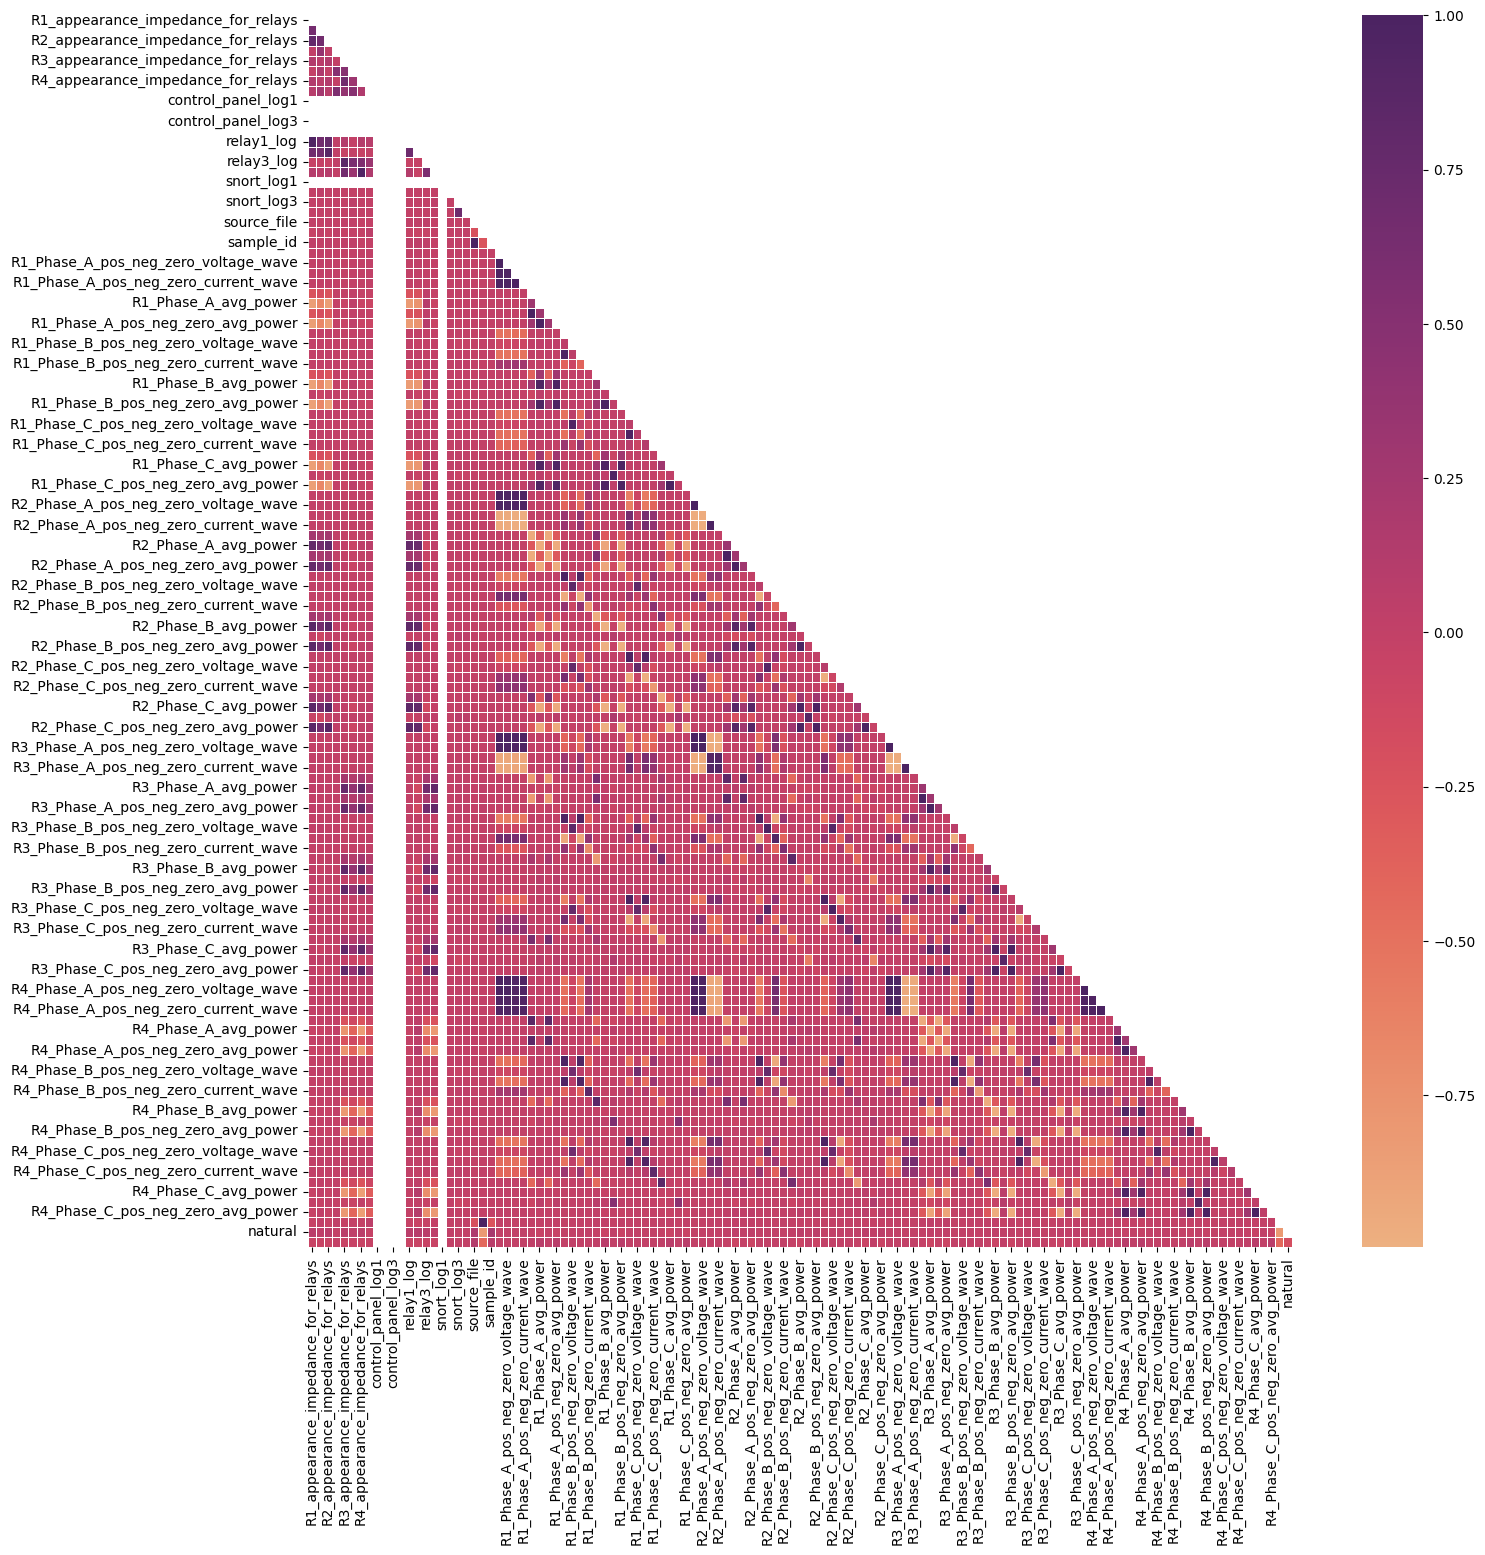

In [47]:
%matplotlib

mask = np.full_like(corr,0)
for i in range(len(mask)):
    for j in range(len(mask[0])):
        if i <= j:
            mask[i][j] = 1

plt.figure(figsize=(16, 16))
sns.heatmap(data=corr, fmt='.1f', mask=mask, linewidth=.5, cmap=sns.color_palette('flare',as_cmap=True))


In [48]:
# cross correlation - list the top ones
for col in corr.columns:
    print(col,'\n', corr[col].sort_values(ascending=False)[0:10],'\n')

R1_appearance_impedance_for_relays 
 R1_appearance_impedance_for_relays    1.000000
relay1_log                            0.954498
R2_Phase_C_avg_power                  0.861935
R2_Phase_C_pos_neg_zero_avg_power     0.861935
R2_Phase_B_avg_power                  0.861889
R2_Phase_B_pos_neg_zero_avg_power     0.861889
R2_appearance_impedance_for_relays    0.801731
R2_Phase_A_avg_power                  0.786831
R2_Phase_A_pos_neg_zero_avg_power     0.786831
relay2_log                            0.675852
Name: R1_appearance_impedance_for_relays, dtype: float64 

R1_status_flag_for_relays 
 R1_status_flag_for_relays             1.000000
relay1_log                            0.674776
R2_appearance_impedance_for_relays    0.671345
R2_Phase_A_avg_power                  0.662729
R2_Phase_A_pos_neg_zero_avg_power     0.662729
R2_Phase_C_pos_neg_zero_avg_power     0.660180
R2_Phase_C_avg_power                  0.660180
R2_Phase_B_avg_power                  0.657243
R2_Phase_B_pos_neg_zero_avg_po